# **Predicting the alpha signal using microblogging data**

### **What is an alpha signal..?**
Alpha is a metric used to gauge the outperformance of a trading portfolio over a normalised portfolio. It is one of modern portfolio theory’s statistical measures used to quantify the returns made from an investment against a benchmark. The better the alpha value, the better an investment performed against market indices.

A single integer value represents the metric. A positive alpha value indicates that the fund performed better than benchmarks, while a negative value denotes the opposite. So an alpha of 1 tells you that investment is doing 1% better than the benchmark value.

### **Why is alpha so important?**
In point of view of hedge fund there are two important reasons why alpha signal is important

1. As they get better alpha signal people who have invested in the hedge fund make profit 
2. More importantly if the investors in hedge funds make profit,hedge funds get 20% of profits...and to make more profit they have to get good returns for their investors and a better way to do that is predicting alpha signal and investing based on it.


### **What is the problem??**
Predicting alpha signal requires several factors which are to be collected from large number of data vendors at very high price.

We alredy have the alpha signals predicted by near perfect algorithm using all the factors available,and task at hand is to replicate the alpha signals generated by the algorithm just by using seven factors and microblogging data collected from stocktwits.


## **(Part-A).....Exploratory Data Analysis(EDA)**
### EDA will be done for files (train_data-1573118738755.json and train_factors-1573207730757.csv)

![alt text](https://drive.google.com/uc?id=1wp5tAYrc0Rx0e9KHnQGHZTHUUiqxiF8h)



### **What are we dealing with?**
Exploring the data related to Stocktwits


### **What is Stocktwits?** 


![alt text](https://drive.google.com/uc?id=1LRAhiQqOllW360r9crUdB7FbyZWw7adr)

StockTwits is a social media platform designed for sharing ideas between investors, traders, and entrepreneurs.


The company utilises Twitter's application programming interface (API) to integrate StockTwits as its own "highly graphical platform of market news, sentiment and stock-picking tools."StockTwits utilises "cashtags" with the stock ticker symbol, similar to the Twitter hashtag, as a way of indexing people's thoughts and ideas about a company and the stock.


StockTwits allows users to communicate to Ticker Streams in real time with the use of cashtags. Users are also able to communicate directly using the "@" symbol before a username, a feature seen on Twitter.





### **There are two parts for this EDA**
Part_1:- EDA for data related to Stocktwits

part_2:- EDA for data related to factors to predict Alpha value

### **Part_1**

In [1]:
#Since i'm using Google Colab for this notebook i am mounting Google Drive to access data from cloud.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Importing required packages**

In [187]:
#Libraries to handle the data
import pandas as pd
import numpy as np

#Libraries to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image

#Library for getting statistical data
import statistics

#Library to deal with variables related to date and time
import datetime as dt

#Libraries for NLP
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from collections import Counter
import string
import spacy
!pip install demoji
import demoji
demoji.download_codes()
!pip install category_encoders
import category_encoders as ce

#for model building
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,learning_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,Imputer

#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
... OK (Got response in 0.12 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [0]:
#path to the current directory
path='/content/drive/My Drive/PHD/'

In [4]:
df=pd.read_json(path+'train_data-1573118738755.json')
df.head()

,records
0,{'stocktwit_tweet': '$AMD going up but hesitat...
1,{'stocktwit_tweet': '@inforlong @MariaGascon D...
2,"{'stocktwit_tweet': '$AVGO WTF?', 'sentiment_s..."
3,{'stocktwit_tweet': '$PH New Insider Filing O...
4,{'stocktwit_tweet': '$FB if it bounces tommorr...


### **Preparing a dataframe from .json file**

In [5]:
#everything in red is the code used to parse the data in json file and is saved into .csv file format
'''df_dict={'stocktwit_tweet':[],'ticker':[],'timestamp':[],'sentiment_score':[]}
for i in range(len(train_data)):
    df_dict['stocktwit_tweet'].append(train_data.iloc[i,]['records']['stocktwit_tweet'])
    df_dict['sentiment_score'].append(train_data.iloc[i,]['records']['sentiment_score'])
    df_dict['timestamp'].append(train_data.iloc[i,]['records']['timestamp'])
    df_dict['ticker'].append(train_data.iloc[i,]['records']['ticker'])
df=pd.DataFrame(df_dict)
df.to_csv('stockwit_tweet_new.csv')
df.head() '''
df=pd.read_csv(path+'stockwit_tweet_new.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,stocktwit_tweet,ticker,timestamp,sentiment_score
0,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19 18:38:28+00:00,3
1,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09 03:51:06+00:00,3
2,$AVGO WTF?,$AVGO,2018-07-12 13:35:32+00:00,2
3,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19 03:32:50+00:00,2
4,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23 19:07:54+00:00,3


In [6]:
#getting the shape and datatypes of different columns
print('shape of the df is:',df.shape)
df.dtypes

shape of the df is: (1039131, 4)


stocktwit_tweet    object
ticker             object
timestamp          object
sentiment_score     int64
dtype: object

In [7]:
df.info() #no null values are present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039131 entries, 0 to 1039130
Data columns (total 4 columns):
stocktwit_tweet    1039131 non-null object
ticker             1039131 non-null object
timestamp          1039131 non-null object
sentiment_score    1039131 non-null int64
dtypes: int64(1), object(3)
memory usage: 31.7+ MB


### **converting data types**

In [8]:
#converting time stamp from object into datetime data type
df['timestamp']=pd.to_datetime(df['timestamp'])
df.dtypes

stocktwit_tweet                 object
ticker                          object
timestamp          datetime64[ns, UTC]
sentiment_score                  int64
dtype: object

### **Extracting Features from timestamp**

In [9]:
#extracting new columns from timestamp
df['date']=pd.to_datetime(df['timestamp']).dt.date        #column name: date
df['time']=pd.to_datetime(df['timestamp']).dt.time        #column name: time
df['hour']=pd.to_datetime(df['timestamp']).dt.hour        #column name: hour
df['day']=pd.to_datetime(df['timestamp']).dt.day          #column name: day (day of month)
df['month']=pd.to_datetime(df['timestamp']).dt.month      #column name: month
df['year']=pd.to_datetime(df['timestamp']).dt.year        #column name: year
df['weekday']=pd.to_datetime(df['timestamp']).dt.weekday  #column name: day of week 
df.drop('timestamp',axis=1,inplace=True)
df.head()

,stocktwit_tweet,ticker,sentiment_score,date,time,hour,day,month,year,weekday
0,$AMD going up but hesitating however chart is ...,$AMD,3,2018-09-19,18:38:28,18,19,9,2018,2
1,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,3,2018-10-09,03:51:06,3,9,10,2018,1
2,$AVGO WTF?,$AVGO,2,2018-07-12,13:35:32,13,12,7,2018,3
3,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2,2018-07-19,03:32:50,3,19,7,2018,3
4,$FB if it bounces tommorrow do the right thing...,$FB,3,2018-08-23,19:07:54,19,23,8,2018,3


### **Few visualizations related to tweets**

#### Observations- number of characters in a tweet usually range from 60-120

The average number of characters in a tweet are 87.


Text(0.5, 1.0, 'distribution of number of characters in a tweet')

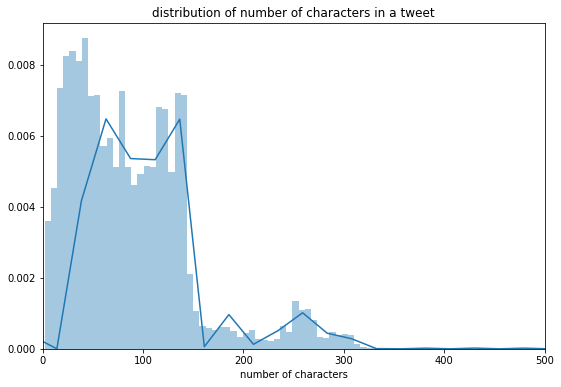

In [10]:
plt.rcParams["figure.figsize"] = (9,6)
lengths=[]
for i in range(len(df)):
    lengths.append(len(df.stocktwit_tweet[i]))
print('The average number of characters in a tweet are {0:.0f}.'.format(statistics.mean(lengths)))
plt.xlim(0,500)
sns.distplot(lengths,bins=500)
plt.xlabel('number of characters')
plt.title('distribution of number of characters in a tweet')

#### **Observations- Tweet lenght oscillates around (10-20) and maximum tweet length is around 30**

the average length of tweet is 12.


Text(0.5, 1.0, 'distribution tweet length')

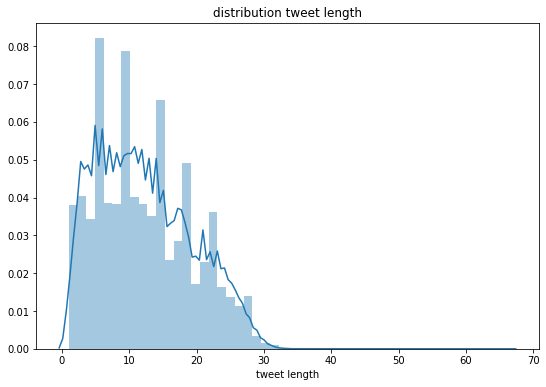

In [11]:
lengths=[]
for i in range(len(df)):
    lengths.append(len(df.stocktwit_tweet[i].split()))
print('the average length of tweet is {0:.0f}.'.format(statistics.mean(lengths)))
sns.distplot(lengths)
plt.xlabel('tweet length')
plt.title('distribution tweet length')

In [12]:
#making all the characters into lower case
df['stocktwit_tweet']=df['stocktwit_tweet'].str.lower()
df['ticker']=df['ticker'].str.lower()
df.head()

,stocktwit_tweet,ticker,sentiment_score,date,time,hour,day,month,year,weekday
0,$amd going up but hesitating however chart is ...,$amd,3,2018-09-19,18:38:28,18,19,9,2018,2
1,@inforlong @mariagascon despite\nchina trade w...,$cat,3,2018-10-09,03:51:06,3,9,10,2018,1
2,$avgo wtf?,$avgo,2,2018-07-12,13:35:32,13,12,7,2018,3
3,$ph\n new insider filing on: \n muller klaus p...,$ph,2,2018-07-19,03:32:50,3,19,7,2018,3
4,$fb if it bounces tommorrow do the right thing...,$fb,3,2018-08-23,19:07:54,19,23,8,2018,3


### **All functions required for preprocessing**

In [0]:
# Removing usernames
def removing_usernames(text):
    text= re.sub('@[A-Za-z0-9_]+','',text)
    return text

# Removing URLs
def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Removing punctuations
def removing_punctuation(text):
    Punctuation=string.punctuation
    return text.translate(str.maketrans('','',Punctuation))

# Removing stopwords
def removing_stopwords(text):
   #removing some important stopwords from stopwords
    Stopwords=set(stopwords.words('english'))
    important_stop_words=['up','down','below','above','before','after','over','under','same','until','more']
    for word in important_stop_words:
        Stopwords.remove(word)
    return " ".join([word for word in str(text).split() if word not in Stopwords])

# Lemmatization of words
def lemmatizing_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Removing emoji's
def removing_emoji(text):
    text=demoji.replace(text)
    return text

# Removing numbers
def removing_numbers(text):
    text=re.sub('\d{1,10}','',text)
    return text

# Removing tickers from tweet
def removing_ticker(text):
    return " ".join([word for word in str(text).split() if word not in ticker_list])

### **Preprocessing**

In [14]:
#removing usernames
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text: removing_usernames(text))
#removing urls
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text:removing_urls(text))
#removing punctuation
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text:removing_punctuation(text))
df['ticker']=df['ticker'].apply(lambda text:removing_punctuation(text))
#removing stopwords
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text:removing_stopwords(text))
#lemmatization of words
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text: lemmatizing_words(text))
#removing emoji's
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text: removing_emoji(text))
#removing tickers from stocktwit_tweet
ticker_list=[]
for tick in df.ticker:
    if tick not in ticker_list:
        ticker_list.append(tick)
df['stocktwit_tweet']=df['stocktwit_tweet'].apply(lambda text: removing_ticker(text))

df.head()

,stocktwit_tweet,ticker,sentiment_score,date,time,hour,day,month,year,weekday
0,going up hesitating however chart stable going...,amd,3,2018-09-19,18:38:28,18,19,9,2018,2
1,despite china trade war held,cat,3,2018-10-09,03:51:06,3,9,10,2018,1
2,wtf,avgo,2,2018-07-12,13:35:32,13,12,7,2018,3
3,new insider filing muller klaus peter transact...,ph,2,2018-07-19,03:32:50,3,19,7,2018,3
4,bounce tommorrow right thing gtfo,fb,3,2018-08-23,19:07:54,19,23,8,2018,3


### **Creating trigrams**

#### **Trigram for sentiment_4(positive_sentiment)**

Text(0.5, 1.0, 'top 30 trigrams for sentiment_4(positive_sentiment')

<Figure size 1080x1080 with 0 Axes>

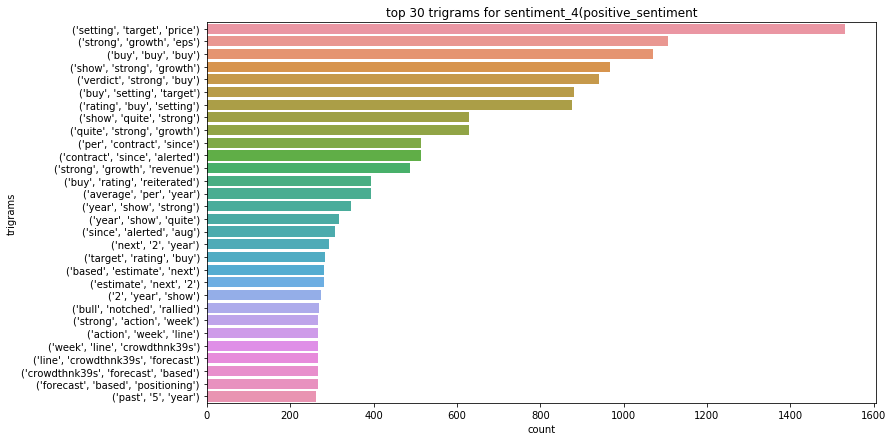

In [15]:
plt.figure(figsize=(15,15))
text = ' '.join(df.loc[df.sentiment_score == 4, 'stocktwit_tweet'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]
count=Counter(text_trigrams).most_common(30)
dataframe=pd.DataFrame(count,columns=['trigrams','count'])
plt.figure(figsize=(12,7))
sns.barplot(x='count',y='trigrams',data=dataframe)
plt.title('top 30 trigrams for sentiment_4(positive_sentiment')

#### **Trigram for sentiment_3(moderate positive sentiment)**

Text(0.5, 1.0, 'top 30 trigrams for sentiment_4(moderate_positive_sentiment')

<Figure size 1080x1080 with 0 Axes>

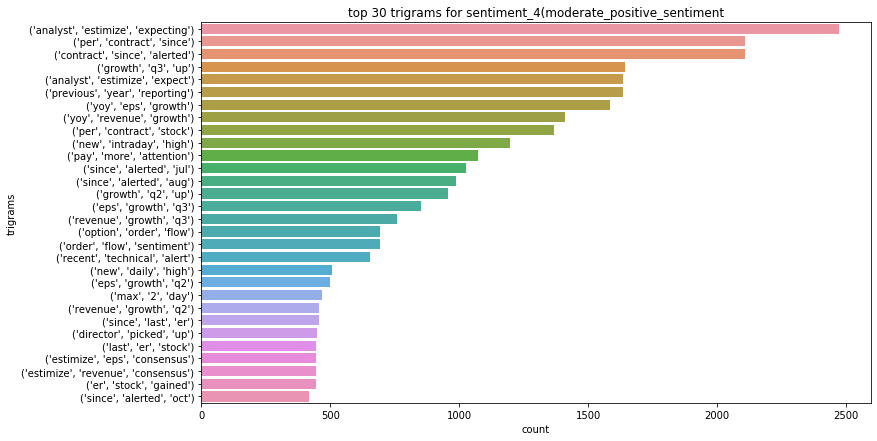

In [16]:
plt.figure(figsize=(15,15))
text = ' '.join(df.loc[df.sentiment_score == 3, 'stocktwit_tweet'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]
count=Counter(text_trigrams).most_common(30)
dataframe=pd.DataFrame(count,columns=['trigrams','count'])
plt.figure(figsize=(12,7))
sns.barplot(x='count',y='trigrams',data=dataframe)
plt.title('top 30 trigrams for sentiment_4(moderate_positive_sentiment')

#### **Trigram for sentiment_2(neutral_sentiment)**

Text(0.5, 1.0, 'top 30 trigrams for sentiment_2(neutral_sentiment')

<Figure size 1080x1080 with 0 Axes>

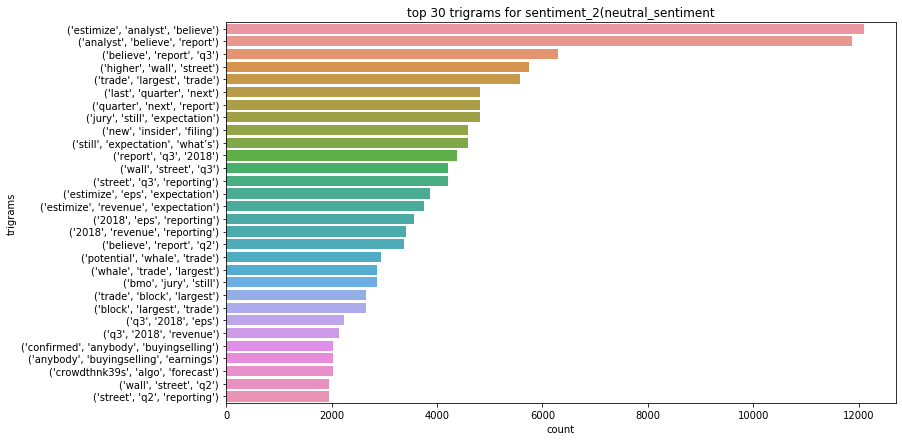

In [17]:
plt.figure(figsize=(15,15))
text = ' '.join(df.loc[df.sentiment_score == 2, 'stocktwit_tweet'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]
count=Counter(text_trigrams).most_common(30)
dataframe=pd.DataFrame(count,columns=['trigrams','count'])
plt.figure(figsize=(12,7))
sns.barplot(x='count',y='trigrams',data=dataframe)
plt.title('top 30 trigrams for sentiment_2(neutral_sentiment')

#### **Trigram for sentiment_1(moderate_negative_sentiment)**

Text(0.5, 1.0, 'top 30 trigrams for sentiment_1(moderate_negative_sentiment')

<Figure size 1080x1080 with 0 Axes>

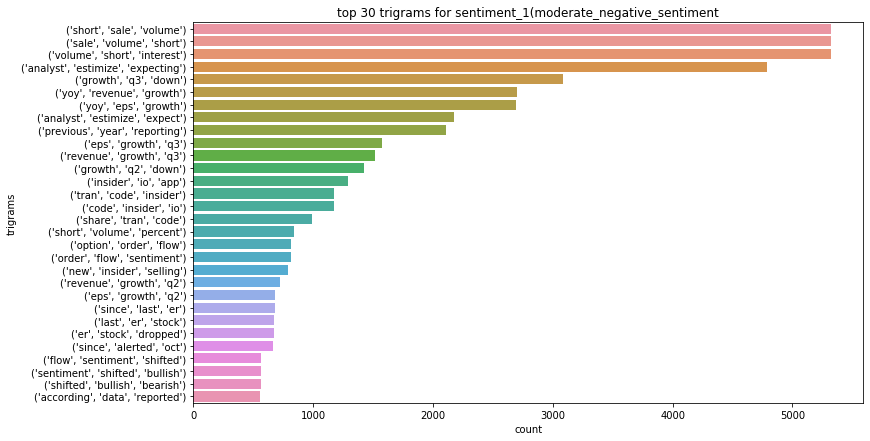

In [18]:
plt.figure(figsize=(15,15))
text = ' '.join(df.loc[df.sentiment_score == 1, 'stocktwit_tweet'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]
count=Counter(text_trigrams).most_common(30)
dataframe=pd.DataFrame(count,columns=['trigrams','count'])
plt.figure(figsize=(12,7))
sns.barplot(x='count',y='trigrams',data=dataframe)
plt.title('top 30 trigrams for sentiment_1(moderate_negative_sentiment')

#### **Trigram for sentiment_0(negative_sentiment)**

Text(0.5, 1.0, 'top 30 trigrams for sentiment_0(negative_sentiment')

<Figure size 1080x1080 with 0 Axes>

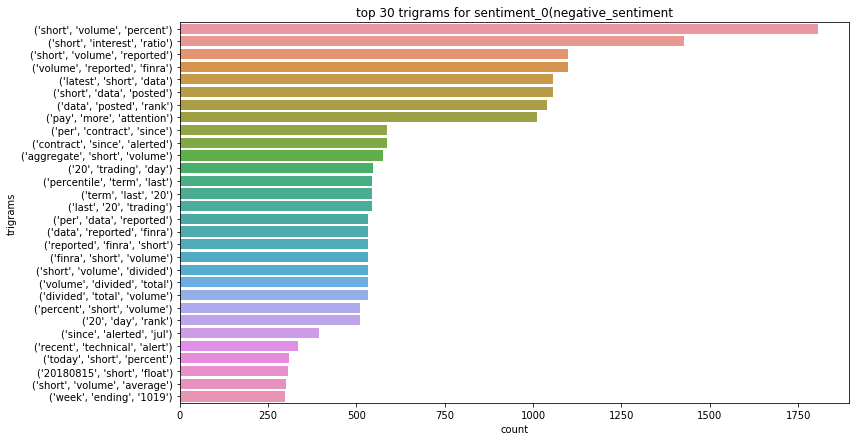

In [19]:
plt.figure(figsize=(15,15))
text = ' '.join(df.loc[df.sentiment_score == 0, 'stocktwit_tweet'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]
count=Counter(text_trigrams).most_common(30)
dataframe=pd.DataFrame(count,columns=['trigrams','count'])
plt.figure(figsize=(12,7))
sns.barplot(x='count',y='trigrams',data=dataframe)
plt.title('top 30 trigrams for sentiment_0(negative_sentiment')

### **Creating wordcloud for positive and negative sentiments**

In [0]:
#creating wordcloud only for sentiment scores 4 and 0 most(positive and negative)
positive_df=df[df.sentiment_score==4]  #data frame with positive sentiment
negative_df=df[df.sentiment_score==0]  #data frame with negative sentiment

In [0]:
#creating mask for wordcloud 
mask1 = np.array(Image.open('/content/drive/My Drive/PHD/bull2.jpg'))


#creating a function to give a green color with different intensities
def green_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 114.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#similarly with red
def red_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 8.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

Text(0.5, 1.0, 'wordcloud of positive sentiment words')

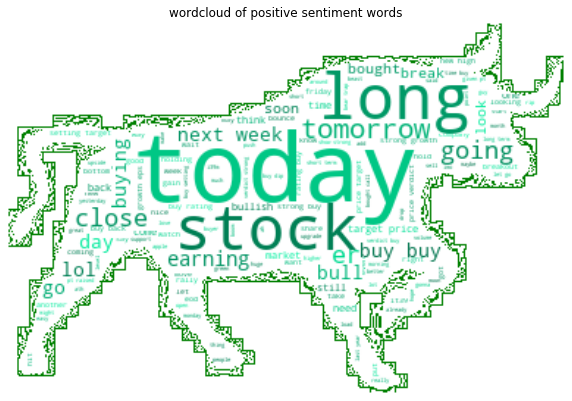

In [22]:
k_p= (' '.join(positive_df['stocktwit_tweet']))
wordcloud = WordCloud(background_color="white", max_words=10000, mask=mask1,
                      max_font_size=90,color_func=green_color_func,
                      contour_width=0.01,contour_color='green').generate(k_p)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('wordcloud of positive sentiment words')

Text(0.5, 1.0, 'wordcloud of negative sentiment words')

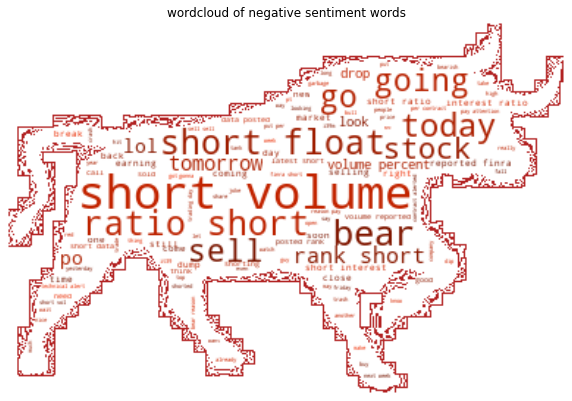

In [23]:
k_n= (' '.join(negative_df['stocktwit_tweet']))
wordcloud = WordCloud(background_color="white", max_words=10000, mask=mask1,
                      max_font_size=90,color_func=red_color_func,
                      contour_width=0.01,contour_color='firebrick').generate(k_n)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('wordcloud of negative sentiment words')

### **Back again to EDA**

Text(0, 0.5, 'count')

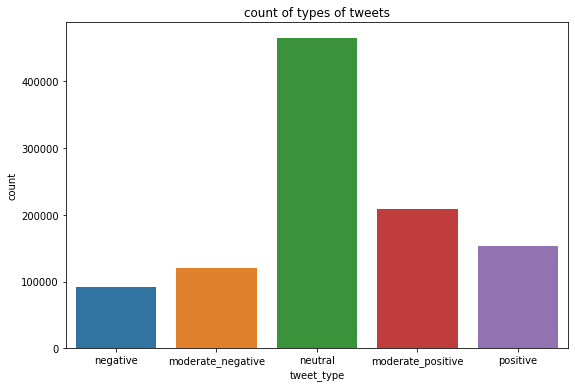

In [24]:
sns.countplot(df.sentiment_score)
plt.title('count of types of tweets')
plt.xticks(np.arange(5),('negative','moderate_negative','neutral','moderate_positive','positive'),rotation=0)
plt.xlabel('tweet_type')
plt.ylabel('count')

### **Creating three new dataframes**

1. grouped by ticker
2. grouped by date
3. grouped by time



#### **ticker_df**

In [0]:
ticker=[]
negative=[]
moderate_negative=[]
neutral=[]
moderate_positive=[]
positive=[]
for i in set(df.ticker):
    ticker.append(i)
    try:
        negative.append(df[df.ticker==i].sentiment_score.value_counts()[0])
    except:
        negative.append(0)
    try:
        moderate_negative.append(df[df.ticker==i].sentiment_score.value_counts()[1])
    except:
        moderate_negative.append(0)
    try:
        neutral.append(df[df.ticker==i].sentiment_score.value_counts()[2])
    except:
        neutral.append(0)
    try:
        moderate_positive.append(df[df.ticker==i].sentiment_score.value_counts()[3])
    except:
        moderate_positive.append(0)
    try:
        positive.append(df[df.ticker==i].sentiment_score.value_counts()[4])
    except:
        positive.append(0)

In [26]:
ticker_df = pd.DataFrame(ticker)
ticker_df.columns=['ticker']
ticker_df['negative'] = negative
ticker_df['moderate_negative'] = moderate_negative
ticker_df['neutral'] = neutral
ticker_df['moderate_positive'] = moderate_positive
ticker_df['positive'] = positive
ticker_df['total_tweets']=ticker_df['negative']+ticker_df['moderate_negative']+ticker_df['neutral']+ticker_df['moderate_positive']+ticker_df['positive']
ticker_df['mean_sentiment']=((ticker_df['negative'])*0+(ticker_df['moderate_negative'])*1+
                             (ticker_df['neutral'])*2+(ticker_df['moderate_positive'])*3+
                             (ticker_df['positive'])*4)/ticker_df['total_tweets']
ticker_df.head()

,ticker,negative,moderate_negative,neutral,moderate_positive,positive,total_tweets,mean_sentiment
0,lyb,23,43,153,40,32,291,2.051546
1,pf,0,0,6,0,0,6,2.000000
2,oncs,0,0,0,1,0,1,3.000000
3,aker,0,0,1,1,0,2,2.500000
4,lrcx,362,419,1589,721,564,3655,2.193160


#### **date_df**

In [0]:
date=[]
negative=[]
moderate_negative=[]
neutral=[]
moderate_positive=[]
positive=[]
for i in set(df.date):
    date.append(i)
    try:
        negative.append(df[df.date==i].sentiment_score.value_counts()[0])
    except:
        negative.append(0)
    try:
        moderate_negative.append(df[df.date==i].sentiment_score.value_counts()[1])
    except:
        moderate_negative.append(0)
    try:
        neutral.append(df[df.date==i].sentiment_score.value_counts()[2])
    except:
        neutral.append(0)
    try:
        moderate_positive.append(df[df.date==i].sentiment_score.value_counts()[3])
    except:
        moderate_positive.append(0)
    try:
        positive.append(df[df.date==i].sentiment_score.value_counts()[4])
    except:
        positive.append(0)

In [28]:
date_df = pd.DataFrame(date)
date_df.columns=['date']
date_df['days_of_week']=pd.to_datetime(date_df['date']).dt.weekday 
date_df['month']=pd.to_datetime(date_df['date']).dt.month
date_df['negative'] = negative
date_df['moderate_negative'] = moderate_negative
date_df['neutral'] = neutral
date_df['moderate_positive'] = moderate_positive
date_df['positive'] = positive
date_df['total_tweets']=date_df['negative']+date_df['moderate_negative']+date_df['neutral']+date_df['moderate_positive']+date_df['positive']
date_df['mean_sentiment']=((date_df['negative'])*0+(date_df['moderate_negative'])*1+
                           (date_df['neutral'])*2+(date_df['moderate_positive'])*3+
                           (date_df['positive'])*4)/date_df['total_tweets']
date_df.head()

,date,days_of_week,month,negative,moderate_negative,neutral,moderate_positive,positive,total_tweets,mean_sentiment
0,2018-10-03,2,10,1039,1573,5081,2611,1838,12142,2.217098
1,2018-08-06,0,8,630,958,4360,2072,1412,9432,2.283927
2,2018-10-18,3,10,1014,1385,4855,1939,1328,10521,2.112347
3,2018-07-06,4,7,457,565,2763,1458,1108,6351,2.345615
4,2018-08-23,3,8,985,1272,5227,2492,1872,11848,2.252701


#### **time_df**

In [0]:
hour=[]
negative=[]
moderate_negative=[]
neutral=[]
moderate_positive=[]
positive=[]
for i in set(df.hour):
    hour.append(i)
    try:
        negative.append(df[df.hour==i].sentiment_score.value_counts()[0])
    except:
        negative.append(0)
    try:
        moderate_negative.append(df[df.hour==i].sentiment_score.value_counts()[1])
    except:
        moderate_negative.append(0)
    try:
        neutral.append(df[df.hour==i].sentiment_score.value_counts()[2])
    except:
        neutral.append(0)
    try:
        moderate_positive.append(df[df.hour==i].sentiment_score.value_counts()[3])
    except:
        moderate_positive.append(0)
    try:
        positive.append(df[df.hour==i].sentiment_score.value_counts()[4])
    except:
        positive.append(0)

In [30]:
hour_df = pd.DataFrame(hour)
hour_df.columns=['hour']
hour_df['negative'] = negative
hour_df['moderate_negative'] = moderate_negative
hour_df['neutral'] = neutral
hour_df['moderate_positive'] = moderate_positive
hour_df['positive'] = positive
hour_df['total_tweets']=hour_df['negative']+hour_df['moderate_negative']+hour_df['neutral']+hour_df['moderate_positive']+hour_df['positive']
hour_df['mean_sentiment']=((hour_df['negative'])*0+(hour_df['moderate_negative'])*1+
                           (hour_df['neutral'])*2+(hour_df['moderate_positive'])*3+
                           (hour_df['positive'])*4)/hour_df['total_tweets']
hour_df.head()

,hour,negative,moderate_negative,neutral,moderate_positive,positive,total_tweets,mean_sentiment
0,0,2043,2744,9947,4330,3229,22293,2.177545
1,1,1903,2318,8329,3754,2892,19196,2.177850
2,2,2036,2383,7264,3146,2523,17352,2.100104
3,3,1619,1748,7144,2536,2097,15144,2.115161
4,4,1141,1423,5045,1968,1533,11110,2.119622


#### **saving the date_df and ticker_df for future use**

In [0]:
date_df.to_csv('date_df.csv',index=False)
ticker_df.to_csv('ticker_df.csv',index=False)
hour_df.to_csv('hour_df.csv',index=False)

### **setting a filter of minimum 100 tweets per company**

Because if there are less than 100 tweets per company in a data which contains 1,000,000 rows it makes less than 0.01% of data

In [0]:
ticker_df=ticker_df.loc[ticker_df.total_tweets>100,]

#### **top 10 companies with most tweets**

Text(0.5, 1.0, 'top 10 companies with most tweets')

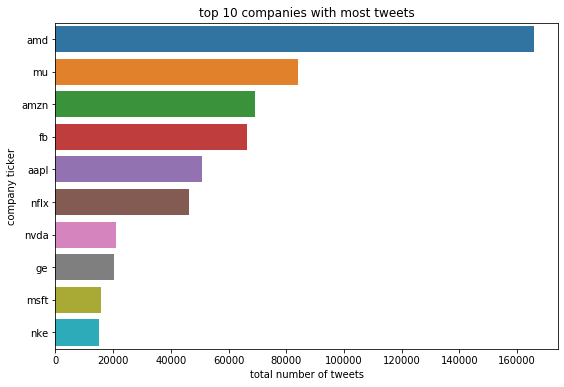

In [33]:
sns.barplot(data=ticker_df.sort_values(by='total_tweets',ascending=False).head(10),x='total_tweets',y='ticker')
plt.xlabel('total number of tweets')
plt.ylabel('company ticker')
plt.title('top 10 companies with most tweets')

#### **top 10 companies with most positive or negative tweets**

Text(0.5, 1.0, 'top 10 companies with most negative tweets')

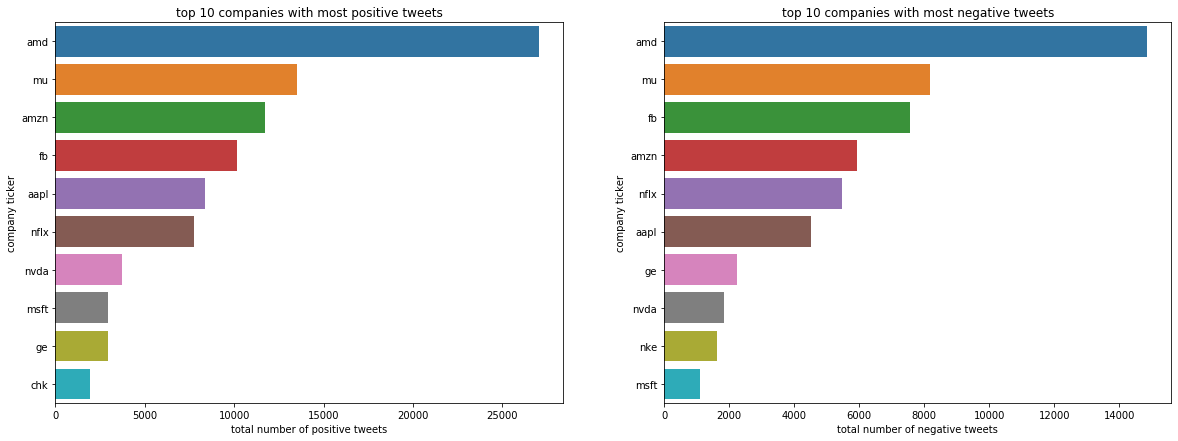

In [34]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(data=ticker_df.sort_values(by='positive',ascending=False).head(10),x='positive',y='ticker')
plt.xlabel('total number of positive tweets')
plt.ylabel('company ticker')
plt.title('top 10 companies with most positive tweets')
plt.subplot(1,2,2)
sns.barplot(data=ticker_df.sort_values(by='negative',ascending=False).head(10),x='negative',y='ticker')
plt.xlabel('total number of negative tweets')
plt.ylabel('company ticker')
plt.title('top 10 companies with most negative tweets')

#### **Top 10 companies with highest positive or negative tweet percentage**

Text(0.5, 1.0, 'top 10 companies with high negative tweet percentage')

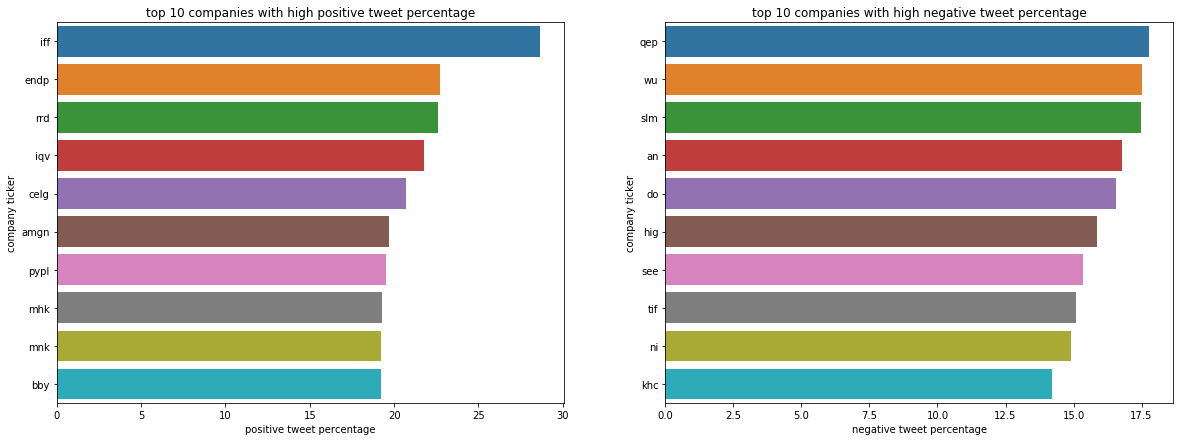

In [35]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ticker_df['percent_positive']=(ticker_df['positive']/ticker_df['total_tweets'])*100
sns.barplot(data=ticker_df.sort_values(by='percent_positive',ascending=False).head(10),x='percent_positive',y='ticker')
plt.xlabel('positive tweet percentage')
plt.ylabel('company ticker')
plt.title('top 10 companies with high positive tweet percentage')

plt.subplot(1,2,2)
ticker_df['percent_negative']=(ticker_df['negative']/ticker_df['total_tweets'])*100
sns.barplot(data=ticker_df.sort_values(by='percent_negative',ascending=False).head(10),x='percent_negative',y='ticker')
plt.xlabel('negative tweet percentage')
plt.ylabel('company ticker')
plt.title('top 10 companies with high negative tweet percentage')

#### **Top 10 companies with highest mean sentiment**



Text(0.5, 1.0, 'sentiment distribution')

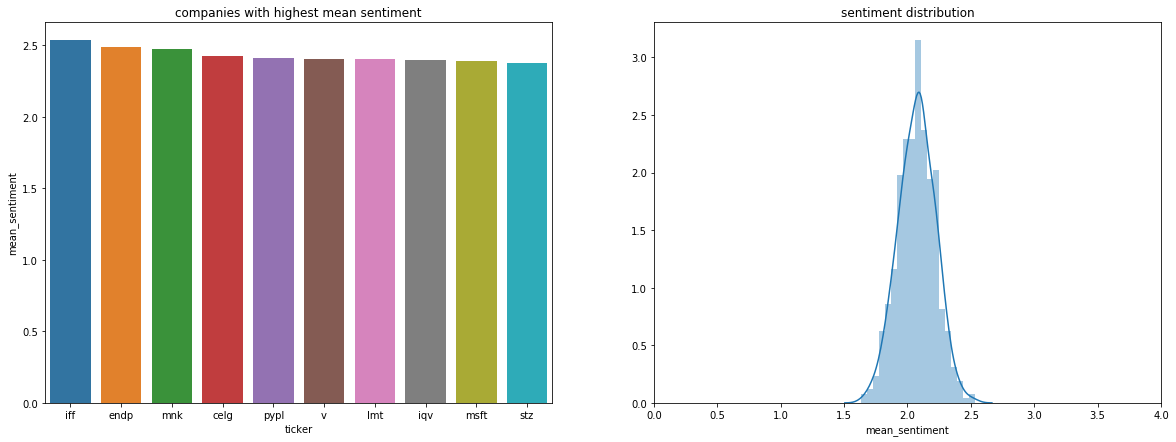

In [36]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(data=ticker_df.sort_values(by='mean_sentiment',ascending=False).head(10),x='ticker',y='mean_sentiment')
plt.xlabel('ticker')
plt.ylabel('mean_sentiment')
plt.title('companies with highest mean sentiment')

plt.subplot(1,2,2)
plt.xlim(0,4)
sns.distplot(ticker_df.mean_sentiment)
plt.xlabel('mean_sentiment')
plt.title('sentiment distribution')

#### **plots related to date and tweets**

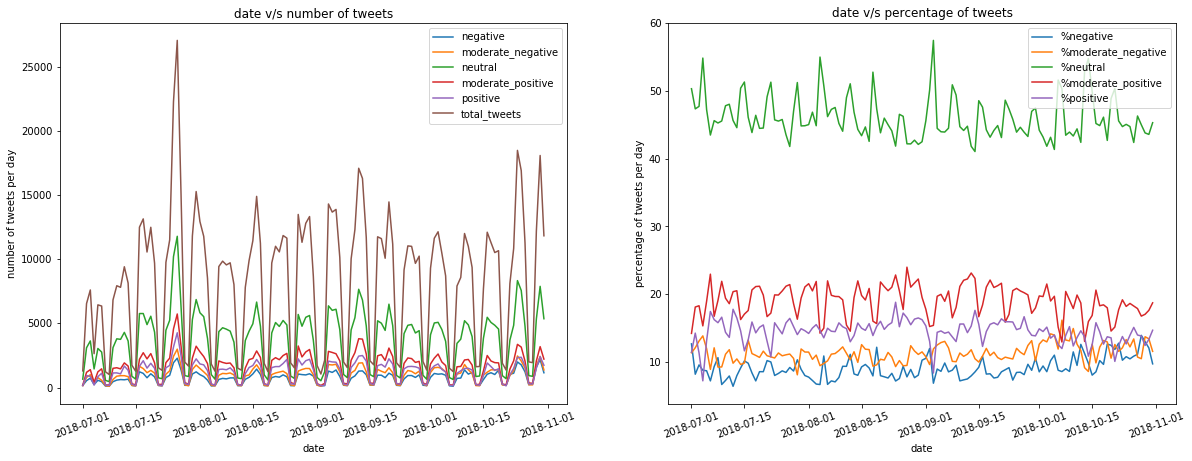

In [37]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
date_df=date_df.sort_values(by='date')
plt.plot(date_df.date,date_df.negative )
plt.plot(date_df.date,date_df.moderate_negative )
plt.plot(date_df.date,date_df.neutral )
plt.plot(date_df.date,date_df.moderate_positive )
plt.plot(date_df.date,date_df.positive )
plt.plot(date_df.date,date_df.total_tweets )
plt.legend(['negative','moderate_negative','neutral','moderate_positive','positive','total_tweets'], loc='upper right')
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('number of tweets per day')
plt.title('date v/s number of tweets')

plt.subplot(1,2,2)
plt.plot(date_df.date,(date_df.negative/date_df.total_tweets)*100)
plt.plot(date_df.date,(date_df.moderate_negative/date_df.total_tweets)*100 )
plt.plot(date_df.date,(date_df.neutral/date_df.total_tweets)*100 )
plt.plot(date_df.date,(date_df.moderate_positive/date_df.total_tweets)*100 )
plt.plot(date_df.date,(date_df.positive/date_df.total_tweets)*100 )
plt.legend(['%negative','%moderate_negative','%neutral','%moderate_positive','%positive'], loc='upper right')
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('percentage of tweets per day')
plt.title('date v/s percentage of tweets')
plt.show()


In [42]:
date_df.loc[date_df.total_tweets>25000,]

,date,days_of_week,month,negative,moderate_negative,neutral,moderate_positive,positive,total_tweets,mean_sentiment
107,2018-07-26,3,7,2285,2990,11789,5732,4267,27063,2.247792


### **Any guess about what happened that day??**

#### Following is the article from Zacks.com(Trading site)
#### **U.S. – EU Trade Tensions Ease**
![alt text](https://drive.google.com/uc?id=1oGCHfAswrX_cgq2lZt_m9IbL6pamnO_M)

The ongoing trade conflict between the United States and the European Union has showed signs of easing on Jul 26 following a meeting in White House between President Trump and the European Commission President Jean-Claude Juncker.

Although the details of the meeting are still not available, President Trump stated afterward that the United States and the European Union will maintain a “close relationship” with “strong trade relations.” The EU will increase liquefied natural gas and soybean imports from the United States. Both sides have also agreed to lower tariffs on industrial goods.

Trump also stated that both United States and EU would “work together toward zero tariffs, zero non-tariff barriers, zero subsidies on non-auto industrial goods.” Moreover, both sides are also working to reach an agreement to avoid increasing tariffs on European auto exports to the United States.

Notably, before the meeting, Trump has threatened the EU that his administration may hike tariffs on EU auto imports from 2.5% to 25% if his meeting with Jean-Claude Juncker fails to deliver fruitful results.

Text(0.5, 1.0, 'days_of_week v/s mean sentiment score')

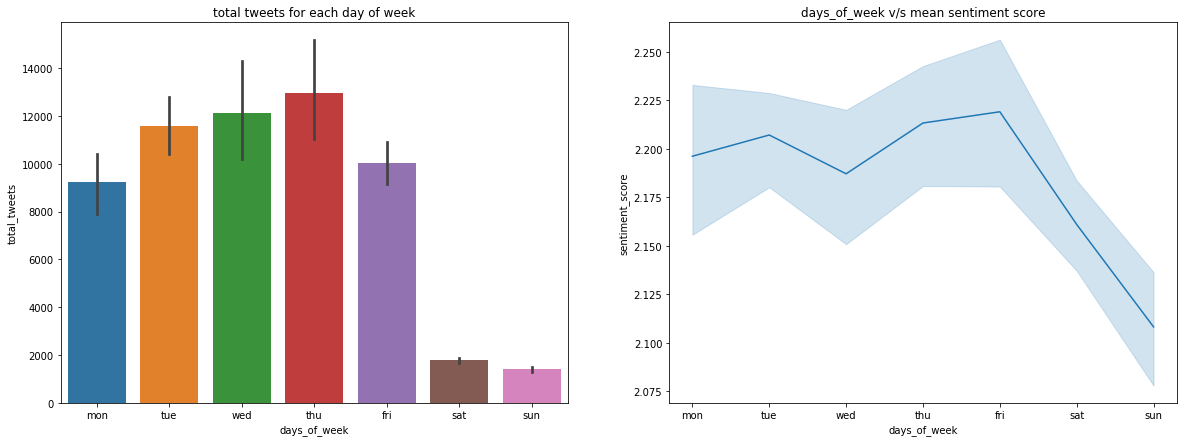

In [38]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(x='days_of_week',y='total_tweets',data=date_df)
plt.xticks(np.arange(7),('mon','tue','wed','thu','fri','sat','sun'))
plt.xlabel('days_of_week')
plt.ylabel('total_tweets')
plt.title('total tweets for each day of week')
plt.subplot(1,2,2)
sns.lineplot(x='days_of_week',y='mean_sentiment',data=date_df)
plt.xticks(np.arange(7),('mon','tue','wed','thu','fri','sat','sun'))
plt.xlabel('days_of_week')
plt.ylabel('sentiment_score')
plt.title('days_of_week v/s mean sentiment score')

Text(0.5, 1.0, 'month v/s mean sentiment score\n 7->july::10->october')

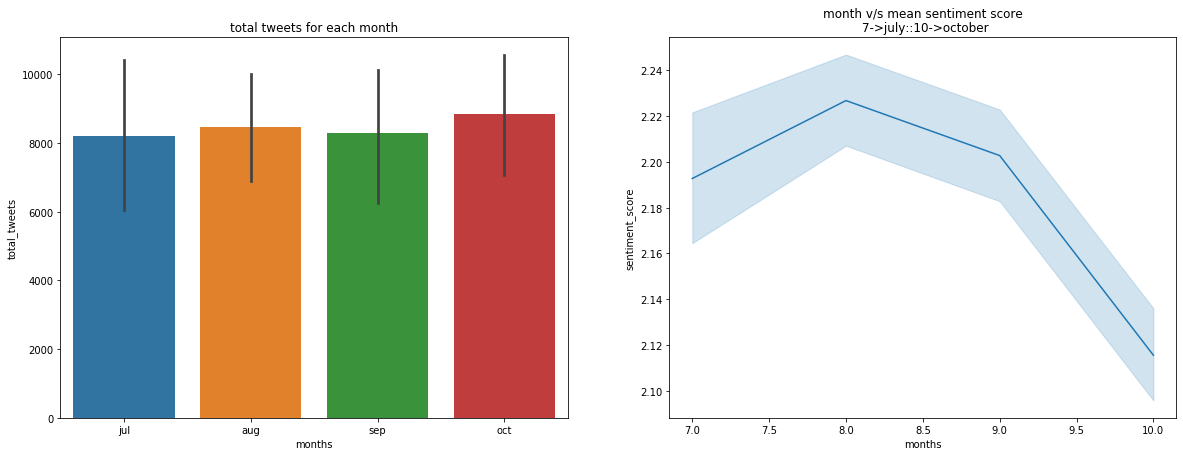

In [39]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(x='month',y='total_tweets',data=date_df)
plt.xticks(np.arange(4),('jul','aug','sep','oct'))
plt.xlabel('months')
plt.ylabel('total_tweets')
plt.title('total tweets for each month')

plt.subplot(1,2,2)
sns.lineplot(x='month',y='mean_sentiment',data=date_df)
plt.xlabel('months')
plt.ylabel('sentiment_score')
plt.title('month v/s mean sentiment score\n 7->july::10->october')

### **Plots related to time and tweets**
### tweets are generated from 9AM to 8PM (opening of market to few hours after the market is closed)

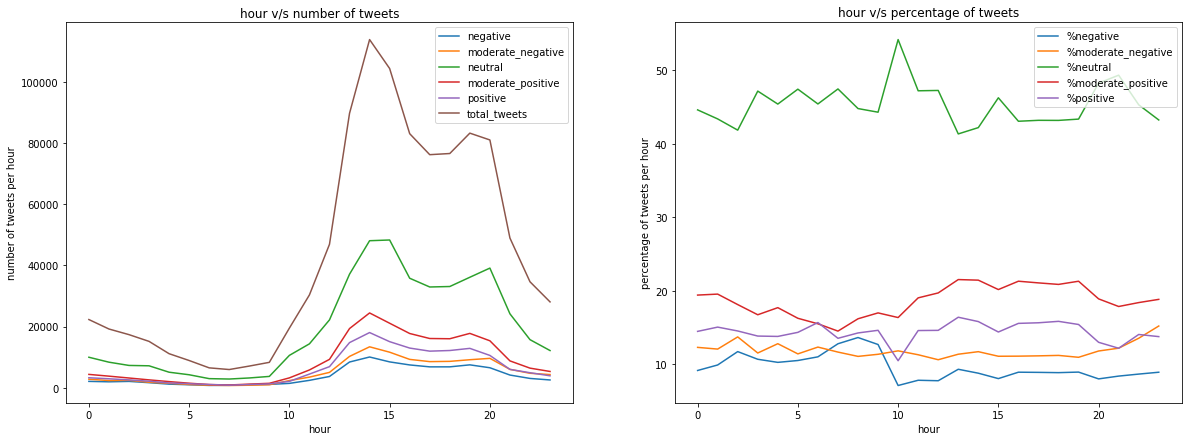

In [40]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
hour_df=hour_df.sort_values(by='hour')
plt.plot(hour_df.hour,hour_df.negative )
plt.plot(hour_df.hour,hour_df.moderate_negative )
plt.plot(hour_df.hour,hour_df.neutral )
plt.plot(hour_df.hour,hour_df.moderate_positive )
plt.plot(hour_df.hour,hour_df.positive )
plt.plot(hour_df.hour,hour_df.total_tweets )
plt.legend(['negative','moderate_negative','neutral','moderate_positive','positive','total_tweets'], loc='upper right')
plt.xlabel('hour')
plt.ylabel('number of tweets per hour')
plt.title('hour v/s number of tweets')

plt.subplot(1,2,2)
plt.plot(hour_df.hour,(hour_df.negative/hour_df.total_tweets)*100)
plt.plot(hour_df.hour,(hour_df.moderate_negative/hour_df.total_tweets)*100 )
plt.plot(hour_df.hour,(hour_df.neutral/hour_df.total_tweets)*100 )
plt.plot(hour_df.hour,(hour_df.moderate_positive/hour_df.total_tweets)*100 )
plt.plot(hour_df.hour,(hour_df.positive/hour_df.total_tweets)*100 )
plt.legend(['%negative','%moderate_negative','%neutral','%moderate_positive','%positive'], loc='upper right')
plt.xlabel('hour')
plt.ylabel('percentage of tweets per hour')
plt.title('hour v/s percentage of tweets')
plt.show()

## **Part-2**

In [0]:
df_2=pd.read_csv(path+'train_factors-1573207730757.csv')

In [44]:
df_2.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


### **converting date from object to date time**

In [45]:
df_2['date']=pd.to_datetime(df_2['date'])
df_2.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-11-10,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-10-07,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-12-09,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


#### **Removing $ from ticker**

In [46]:
df_2['ticker']=df_2['ticker'].apply(lambda text:removing_punctuation(text))
df_2['ticker']=df_2['ticker'].str.lower()
df_2.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-11-10,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-10-07,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-12-09,fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


### **Data is spread over 123 days**

In [47]:
df_2.date.nunique()

123

Text(0.5, 1.0, 'count of various alpha values')

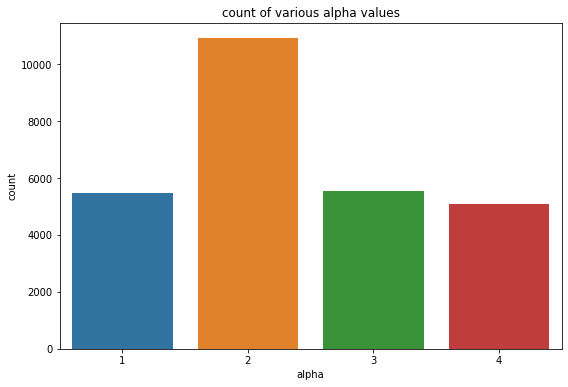

In [48]:
sns.countplot(df_2.alpha)
plt.xlabel('alpha')
plt.ylabel('count')
plt.title('count of various alpha values')

### **Creating two dataframes**

1.   grouped by ticker
2.   grouped by date



#### **alpha_ticker_df**

In [0]:
ticker=[]
alpha_1=[]
alpha_2=[]
alpha_3=[]
alpha_4=[]
for i in set(df_2.ticker):
    ticker.append(i)
    try:
        alpha_1.append(df_2[df_2.ticker==i].alpha.value_counts()[1])
    except:
        alpha_1.append(0)
    try:
        alpha_2.append(df_2[df_2.ticker==i].alpha.value_counts()[2])
    except:
        alpha_2.append(0)
    try:
        alpha_3.append(df_2[df_2.ticker==i].alpha.value_counts()[3])
    except:
        alpha_3.append(0)
    try:
        alpha_4.append(df_2[df_2.ticker==i].alpha.value_counts()[4])
    except:
        alpha_4.append(0)

In [50]:
alpha_ticker_df = pd.DataFrame(ticker)
alpha_ticker_df.columns=['ticker']
alpha_ticker_df['alpha_1'] = alpha_1
alpha_ticker_df['alpha_2'] = alpha_2
alpha_ticker_df['alpha_3'] = alpha_3
alpha_ticker_df['alpha_4'] = alpha_4
alpha_ticker_df['sum_alpha']=alpha_ticker_df['alpha_1']+alpha_ticker_df['alpha_2']+alpha_ticker_df['alpha_3']+alpha_ticker_df['alpha_4']
alpha_ticker_df['mean_alpha']=((alpha_ticker_df['alpha_1'])*1+(alpha_ticker_df['alpha_2'])*2+(alpha_ticker_df['alpha_3'])*3+
                             (alpha_ticker_df['alpha_4'])*4)/alpha_ticker_df['sum_alpha']
alpha_ticker_df.head(6)

,ticker,alpha_1,alpha_2,alpha_3,alpha_4,sum_alpha,mean_alpha
0,fbr,0,1,0,0,1,2.000000
1,xray,6,7,2,5,20,2.300000
2,pcg,11,14,8,7,40,2.275000
3,hotbtc,0,0,0,1,1,4.000000
4,lyb,6,11,1,10,28,2.535714
5,adi,16,16,4,11,47,2.212766


### **alpha_date_df**

In [0]:
date=[]
alpha_1=[]
alpha_2=[]
alpha_3=[]
alpha_4=[]
for i in set(df_2.date):
    date.append(i)
    try:
        alpha_1.append(df_2[df_2.date==i].alpha.value_counts()[1])
    except:
        alpha_1.append(0)
    try:
        alpha_2.append(df_2[df_2.date==i].alpha.value_counts()[2])
    except:
        alpha_2.append(0)
    try:
        alpha_3.append(df_2[df_2.date==i].alpha.value_counts()[3])
    except:
        alpha_3.append(0)
    try:
        alpha_4.append(df_2[df_2.date==i].alpha.value_counts()[4])
    except:
        alpha_4.append(0)

In [52]:
alpha_date_df = pd.DataFrame(date)
alpha_date_df.columns=['date']
alpha_date_df['alpha_1'] = alpha_1
alpha_date_df['alpha_2'] = alpha_2
alpha_date_df['alpha_3'] = alpha_3
alpha_date_df['alpha_4'] = alpha_4
alpha_date_df['sum_alpha']=alpha_date_df['alpha_1']+alpha_date_df['alpha_2']+alpha_date_df['alpha_3']+alpha_date_df['alpha_4']
alpha_date_df['mean_alpha']=((alpha_date_df['alpha_1'])*1+(alpha_date_df['alpha_2'])*2+(alpha_date_df['alpha_3'])*3+
                             (alpha_date_df['alpha_4'])*4)/alpha_date_df['sum_alpha']
alpha_date_df.head(6)

,date,alpha_1,alpha_2,alpha_3,alpha_4,sum_alpha,mean_alpha
0,2018-09-18,49,136,46,47,278,2.327338
1,2018-05-07,54,98,46,46,244,2.344262
2,2018-10-29,74,122,51,27,274,2.113139
3,2018-05-09,50,117,50,52,269,2.386617
4,2018-10-23,56,117,56,34,263,2.258555
5,2018-07-08,59,109,66,52,286,2.388112


### **saving the dataframe in .csv for future use**

In [0]:
alpha_date_df.to_csv('alpha_date_df.csv',index=False)
alpha_ticker_df.to_csv('alpha_ticker_df.csv',index=False)

### **top 10 companies with most number of alpha values**

Text(0.5, 1.0, 'top 10 companies with most alpha values')

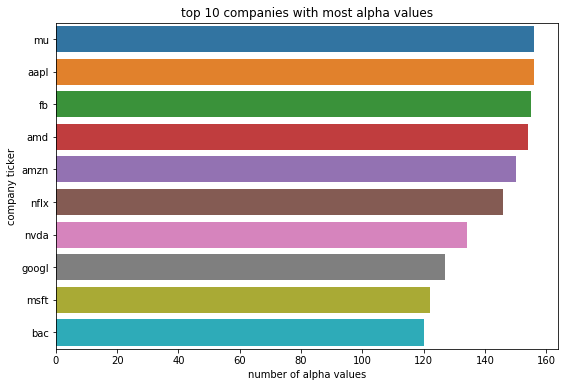

In [54]:
sns.barplot(data=alpha_ticker_df.sort_values(by='sum_alpha',ascending=False).head(10),x='sum_alpha',y='ticker')
plt.xlabel('number of alpha values')
plt.ylabel('company ticker')
plt.title('top 10 companies with most alpha values')

#### **top 10 companies with most alpha_4 or alpha_1 values**

Text(0.5, 1.0, 'top 10 companies with most alpha_1')

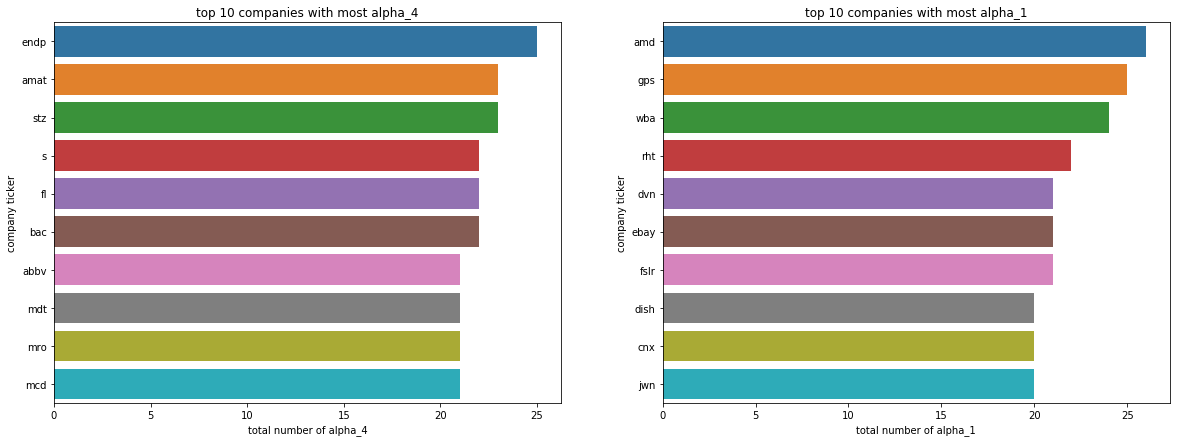

In [55]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(data=alpha_ticker_df.sort_values(by='alpha_4',ascending=False).head(10),x='alpha_4',y='ticker')
plt.xlabel('total number of alpha_4')
plt.ylabel('company ticker')
plt.title('top 10 companies with most alpha_4')
plt.subplot(1,2,2)
sns.barplot(data=alpha_ticker_df.sort_values(by='alpha_1',ascending=False).head(10),x='alpha_1',y='ticker')
plt.xlabel('total number of alpha_1')
plt.ylabel('company ticker')
plt.title('top 10 companies with most alpha_1')

### **Top 10 companies with highest alpha_4 or alpha_1 percentage**

Text(0.5, 1.0, 'top 10 companies with high alpha_1 percentage')

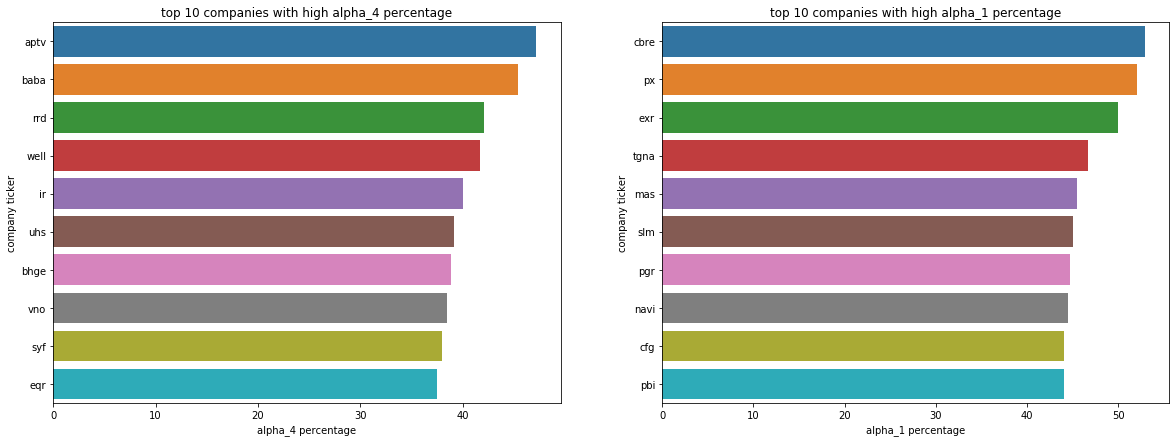

In [56]:
alpha_ticker_df=alpha_ticker_df.loc[alpha_ticker_df.sum_alpha>10,]
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
alpha_ticker_df['percent_alpha_4']=(alpha_ticker_df['alpha_4']/alpha_ticker_df['sum_alpha'])*100
sns.barplot(data=alpha_ticker_df.sort_values(by='percent_alpha_4',ascending=False).head(10),x='percent_alpha_4',y='ticker')
plt.xlabel('alpha_4 percentage')
plt.ylabel('company ticker')
plt.title('top 10 companies with high alpha_4 percentage')

plt.subplot(1,2,2)
alpha_ticker_df['percent_alpha_1']=(alpha_ticker_df['alpha_1']/alpha_ticker_df['sum_alpha'])*100
sns.barplot(data=alpha_ticker_df.sort_values(by='percent_alpha_1',ascending=False).head(10),x='percent_alpha_1',y='ticker')
plt.xlabel('alpha_1 percentage')
plt.ylabel('company ticker')
plt.title('top 10 companies with high alpha_1 percentage')

### **Plots related to ticker and alpha**

Text(0.5, 1.0, 'alpha distribution')

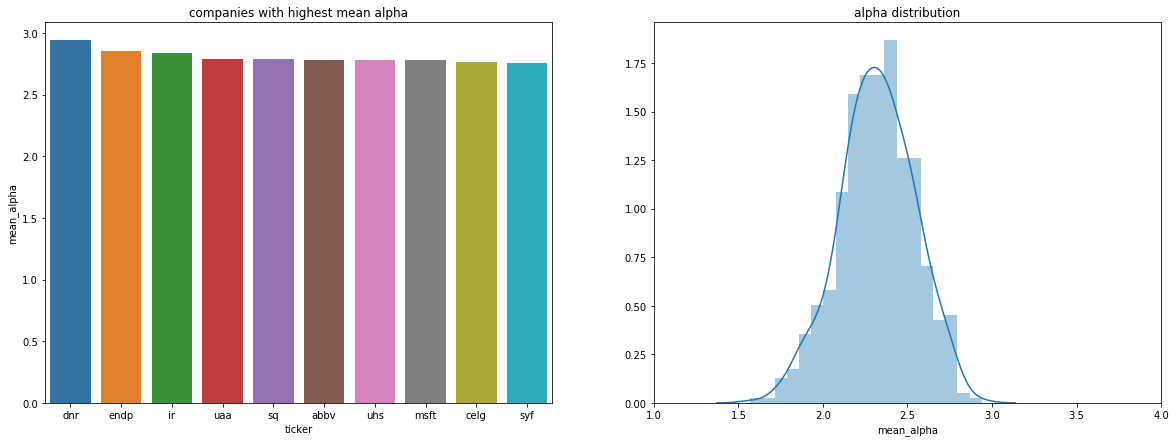

In [57]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.barplot(data=alpha_ticker_df.sort_values(by='mean_alpha',ascending=False).head(10),x='ticker',y='mean_alpha')
plt.xlabel('ticker')
plt.ylabel('mean_alpha')
plt.title('companies with highest mean alpha')

plt.subplot(1,2,2)
plt.xlim(1,4)
sns.distplot(alpha_ticker_df.mean_alpha)
plt.xlabel('mean_alpha')
plt.title('alpha distribution')

### **Plots related to date and alpha**

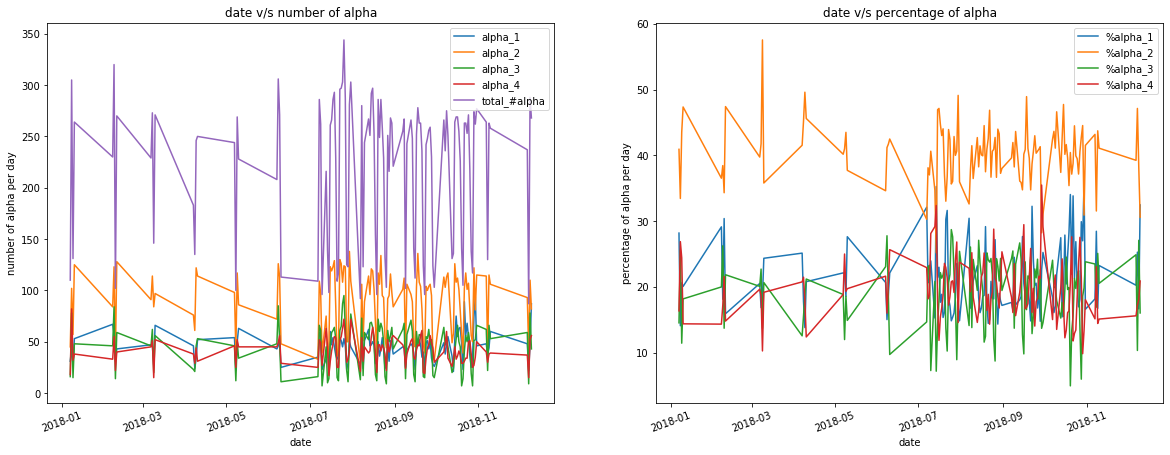

In [58]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
alpha_date_df=alpha_date_df.sort_values(by='date')
plt.plot(alpha_date_df.date,alpha_date_df.alpha_1 )
plt.plot(alpha_date_df.date,alpha_date_df.alpha_2 )
plt.plot(alpha_date_df.date,alpha_date_df.alpha_3 )
plt.plot(alpha_date_df.date,alpha_date_df.alpha_4 )
plt.plot(alpha_date_df.date,alpha_date_df.sum_alpha )
plt.legend(['alpha_1','alpha_2','alpha_3','alpha_4','total_#alpha'], loc='upper right')
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('number of alpha per day')
plt.title('date v/s number of alpha')

plt.subplot(1,2,2)
plt.plot(alpha_date_df.date,(alpha_date_df.alpha_1/alpha_date_df.sum_alpha)*100)
plt.plot(alpha_date_df.date,(alpha_date_df.alpha_2/alpha_date_df.sum_alpha)*100 )
plt.plot(alpha_date_df.date,(alpha_date_df.alpha_3/alpha_date_df.sum_alpha)*100 )
plt.plot(alpha_date_df.date,(alpha_date_df.alpha_4/alpha_date_df.sum_alpha)*100 )
plt.legend(['%alpha_1','%alpha_2','%alpha_3','%alpha_4'], loc='upper right')
plt.xticks(rotation=20)
plt.xlabel('date')
plt.ylabel('percentage of alpha per day')
plt.title('date v/s percentage of alpha')
plt.show()

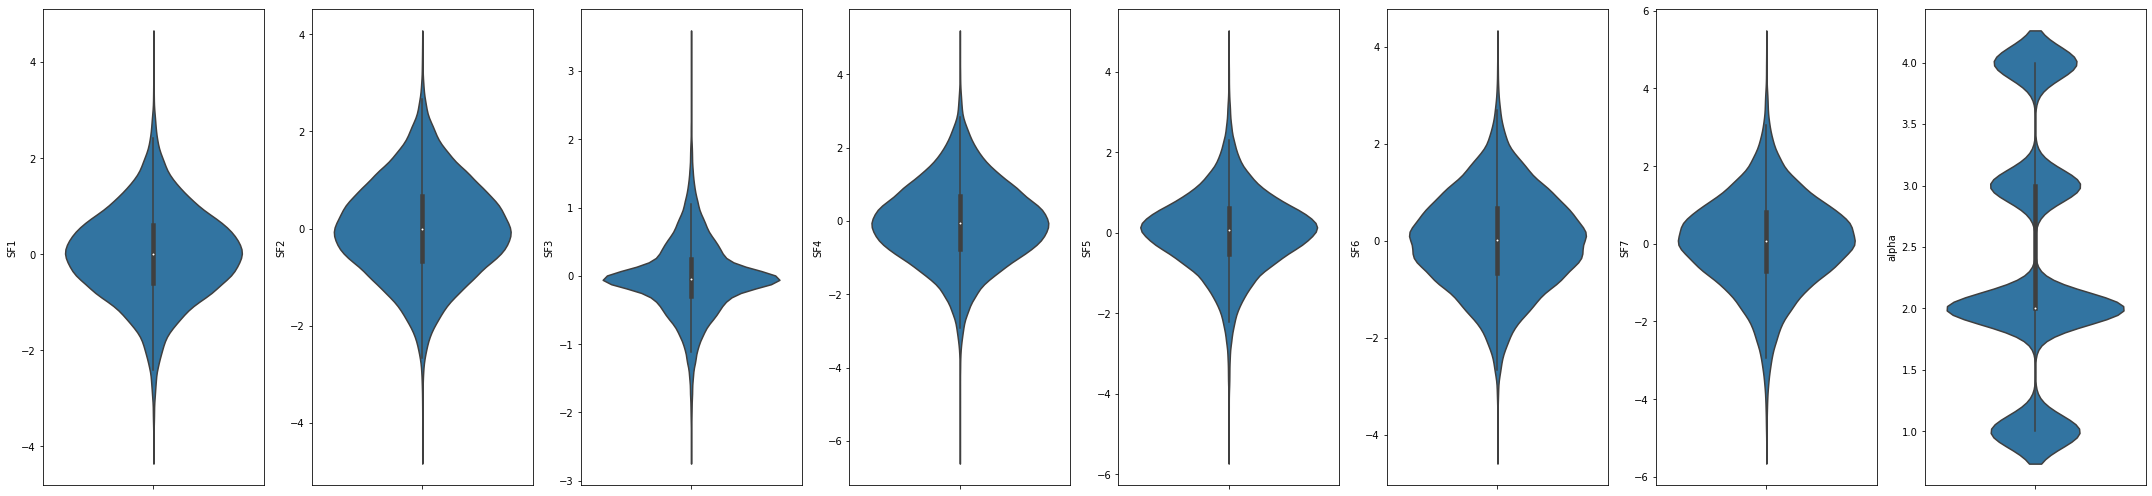

In [60]:
plt.figure(figsize=(30,7))
plt.subplot(1,8,1)
sns.violinplot(y=df_2.SF1)
plt.subplot(1,8,2)
sns.violinplot(y=df_2.SF2)
plt.subplot(1,8,3)
sns.violinplot(y=df_2.SF3)
plt.subplot(1,8,4)
sns.violinplot(y=df_2.SF4)
plt.subplot(1,8,5)
sns.violinplot(y=df_2.SF5)
plt.subplot(1,8,6)
sns.violinplot(y=df_2.SF6)
plt.subplot(1,8,7)
sns.violinplot(y=df_2.SF7)
plt.subplot(1,8,8)
sns.violinplot(y=df_2.alpha)
plt.tight_layout()

### **finding correlations between different variables**

#### observations....
##### high correlation is found between (SF3 and SF5) and (SF4 and SF7)


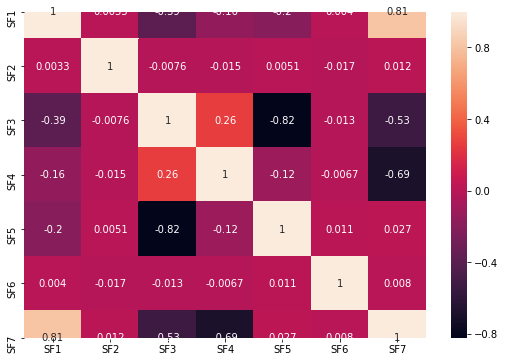

In [61]:
corr=df_2.loc[:,'SF1':'SF7'].corr()
sns.heatmap(corr,annot=True)

##**(Part-B)Model Building**

#### **Model building for sentiment classification of stocktwit_tweets**

In [62]:
#reading the preprocessed train file of stocktwit_tweets
train_df=pd.read_csv(path+'preprocessed_train_json (1).csv')
train_df.head()

,stocktwit_tweet,ticker,timestamp,sentiment_score,date
0,going up hesitating however chart stable going...,amd,2018-09-19 18:38:28+00:00,3,2018-09-19
1,despite china trade war held,cat,2018-10-09 03:51:06+00:00,3,2018-10-09
2,wtf,avgo,2018-07-12 13:35:32+00:00,2,2018-07-12
3,new insider filing muller klaus peter transact...,ph,2018-07-19 03:32:50+00:00,2,2018-07-19
4,bounce tommorrow right thing gtfo,fb,2018-08-23 19:07:54+00:00,3,2018-08-23


In [0]:
#filling empty tweets which actually had only emojis which are now removed with ' '
train_df['stocktwit_tweet'] = train_df['stocktwit_tweet'].fillna(" ")

In [64]:
#reading the preprocessed test file of stocktwit_tweets
test_df=pd.read_csv(path+'preprocessed_test_json (1).csv')
test_df.head()

,stocktwit_tweet,ticker,timestamp,date
0,nothing exited,celg,2018-10-25 14:26:16+00:00,2018-10-25
1,yall exhaust buyer first green candle byeeeeee,amd,2018-07-13 13:50:39+00:00,2018-07-13
2,day trader day,amd,2018-09-25 19:10:54+00:00,2018-09-25
3,NaN,cbs,2018-07-27 22:45:48+00:00,2018-07-27
4,weak price action far today don’t afraid go sh...,mu,2018-07-31 14:59:06+00:00,2018-07-31


In [0]:
#executing similar step as done to train
test_df['stocktwit_tweet'] = test_df['stocktwit_tweet'].fillna(" ")

In [66]:
print(train_df.shape)
print(test_df.shape)

(1039131, 5)
(265022, 4)


In [0]:
#importing fast ai library to do sentiment analysis on stocktwit_tweets
from fastai.text import *

In [69]:
train_df.head()

,stocktwit_tweet,ticker,timestamp,sentiment_score,date
0,going up hesitating however chart stable going...,amd,2018-09-19 18:38:28+00:00,3,2018-09-19
1,despite china trade war held,cat,2018-10-09 03:51:06+00:00,3,2018-10-09
2,wtf,avgo,2018-07-12 13:35:32+00:00,2,2018-07-12
3,new insider filing muller klaus peter transact...,ph,2018-07-19 03:32:50+00:00,2,2018-07-19
4,bounce tommorrow right thing gtfo,fb,2018-08-23 19:07:54+00:00,3,2018-08-23


In [70]:
#creating a dataframe of ticker and date this will be usefull while building model
#which considers sentiment as one of the factors for predicting alpha signal
test_merge_df=test_df.loc[:,['ticker','date']]
test_merge_df.head()

,ticker,date
0,celg,2018-10-25
1,amd,2018-07-13
2,amd,2018-09-25
3,cbs,2018-07-27
4,mu,2018-07-31


### **why the sentences look different**
**xxbos**: Begining of a sentence

**xxfld**: Represent separate parts of a document like title, summary etc., each one will get a separate field and so they will get numbered (e.g. xxfld 1, xxfld 2).

**xxup**: If there's something in all caps, it gets lower cased and a token called xxup will get added to it. Words that are fully capitalized, such as “I AM SHOUTING”, are tokenized as “xxup i xxup am xxup shouting“

**xxunk**: token used instead of an uncommon word.

**xxmaj**: token indicates that there is capitalization of the word. “The” will be tokenized as “xxmaj the“.

**xxrep**: token indicates repeated word, if you have 29 ! in a row, (i.e. xxrep 29 !).

In [71]:
#all the necessary preprocessing is done behind the scene
data = (TextList.from_df(train_df, cols='stocktwit_tweet')
                .split_by_rand_pct(0.1)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,straddle implies ± move qtr absolute avg xxbos mm took sl yet still wo nt bounce po xxbos it ’s even downtrend it ’s flush almost feel deliberate xxbos min chart long term support trend line downtrend resistance today xxbos know drop one day never really come back know xxbos here ’s estimize analyst believe report q revenue reporting tomorrow xxbos does n’t miss long rally bullish xxbos target xxbos
1,lilly co q earnings estimate eps previously xxbos put paying penny spent day xxbos happy worry drop ish look bear xxbos unfortunately going down market awful right xxbos corporate earnings oct turn overall market xxunk continue xxunk xxunk xxunk expect eoy xxbos stock disappointment xxbos xxbos analyst estimize expect yoy growth equity trading revenue q down previous year reporting xxbos update oct call up since alerted sep view detail xxbos
2,xxbos going today xxbos feeling today going brutal day market xxbos xxunk new iphones reveal intel micron toshiba part xxbos expmaxpainhighputoihighcalloi xxbos long term equity good idea xxbos slow melt up new aths continues xxbos goal bought cov call wo n’t work bail try stock suck up xxbos buying frenzy volume puppet master work xxbos bullish above trade near xxbos xxbos bankruptcy filing fear loom large sears investor xxbos after
3,watch push past stupid day trader xxbos avg give today xxbos apple say io health record over backer us open standard xxbos update aug call up per contract since alerted jul maxgain daystoexpire xxbos come ichimoku xxbos xxbos looking good today like slow steady waiting rsi cross cmf positive xxbos new insider filing pfeiffer nicholas transaction code xxbos question close gap back communist seller board lol xxbos idiot note sub
4,notable put write sprint xxbos piece shit going xxbos short volume percent day rank th percentile xxbos crypto decoupled month ago before prior er latest er confirmed xxunk short bear xxbos xxunk xxbos xxbos anyone buying put xxbos short volume reported finra xxbos bull reason pay more attention xxbos block trade microcap share xxbos dead money xxbos jan call spread buyer roll whole nut call spread lol xxbos danaher upgraded


Fast.ai has a pre-trained Wikitext model, consisting of a pre-processed subset of 103 million tokens extracted from Wikipedia. It’s a model that understands a lot about language and a lot about what language describes. Next step is to fine-tune this model and do transfer learning to create a new language model that’s specifically good at predicting the next word of tweets.

In [0]:
learn = language_model_learner(data,AWD_LSTM, drop_mult=0.2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


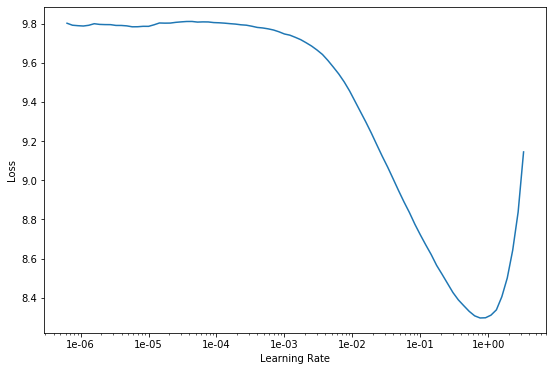

In [73]:
learn.lr_find()
learn.recorder.plot()

#### Start training the model with learning rate 1e-2 using fit_one_cycle.

In [74]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.097491,4.999524,0.293232,16:58
1,4.969022,4.883092,0.301218,16:56
2,4.799331,4.836927,0.305255,16:57


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


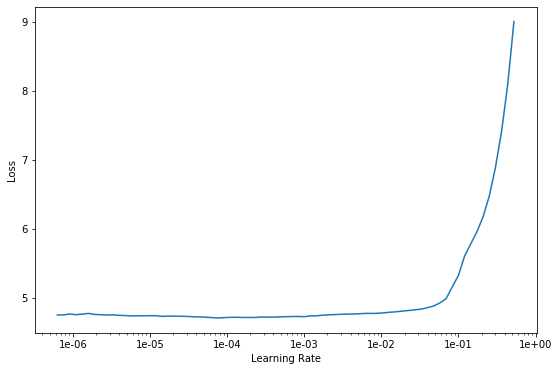

In [75]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(2, 1e-5, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.697967,4.808612,0.306841,19:45
1,4.686916,4.802736,0.307174,19:45


In [0]:
#saving the encoder so that we dont need to train the learner everytime
learn.save_encoder('fine_tuned_enc')

In [78]:
test_datalist = TextList.from_df(test_df, cols='stocktwit_tweet', vocab=data.vocab)

data_clas = (TextList.from_df(train_df, cols='stocktwit_tweet', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= 'sentiment_score')
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos ks ༼ つ ◕ ◕ ༽つ ks take energy ༼ つ ◕ ◕ ༽つ ༼ つ ◕ ◕ ༽つ xxunk energy ༼ つ ◕ ◕ ༽つ ༼ つ ◕ ◕ ༽つ xxunk energy ༼ つ ◕ ◕ ༽つ,2
xxbos record oil price lookin good trump going july th … xxunk collar tea party folk bitch much trump bear,3
xxbos report q eps c consensus c q eps c consensus c say q subscriber acquisition growth slightly lower projected,2
xxbos “ apple must buy tesla tesla rule world ” ah ytd european ev sale oem based top selling model,3
xxbos would hope guy were nt betting farm based er i m disappointed yes worried conf call calm temper,3


#### Creating a text classifier learner. Load in the pre train model 'fine_tuned_enc'

In [0]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn_classifier.load_encoder('fine_tuned_enc')
learn_classifier.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


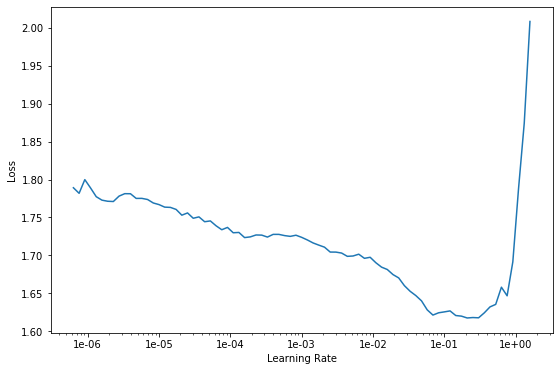

In [80]:
learn_classifier.lr_find()
learn_classifier.recorder.plot()

In [81]:
#fitting the classifier for 3 epochs
learn_classifier.fit_one_cycle(3, 1.20e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.241166,1.150332,0.531218,12:00
1,1.216233,1.131072,0.542382,12:09
2,1.170688,1.084882,0.563034,11:27


#### Freezing the classifier except for the last two layers and training last two layers for 2 epochs

In [82]:
learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.987579,0.889541,0.667486,14:34
1,0.920586,0.845304,0.690770,13:13


#### Freezing the classifier except last three layers and learning them
#### Classifier is able to achieve an accuracy of 72%

In [83]:
learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.819872,0.800057,0.707616,22:12
1,0.786534,0.761589,0.720665,22:27


In [0]:
#predicting the sentiment for test data
preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
labels = np.argmax(preds, axis =1)

In [85]:
#creating a dataframe and saving it for merging it with factors to predict alpha signal
submission_sentiment = pd.DataFrame({'date': test_merge_df.date,'ticker':test_merge_df.ticker ,'Sentiment': labels})
submission_sentiment.to_csv('submission_sentiment_psp.csv', index=False)
submission_sentiment.head()

,date,ticker,Sentiment
0,2018-10-25,celg,2
1,2018-07-13,amd,4
2,2018-09-25,amd,2
3,2018-07-27,cbs,2
4,2018-07-31,mu,0


### **Starting the model building process for alpha signal prediction**

In [0]:
#reading the train_factors
factor_df=pd.read_csv(path+'train_factors-1573207730757.csv')

In [0]:
#reading test_factors
test_factor_df=pd.read_csv(path+'test_factors.csv')

In [0]:
#saving id of test factors for submission
test_factor_id=test_factor_df.Id

In [191]:
#reading preprocessed json file after after training sentiment classifier model
sentiment_df=pd.read_csv(path+'sentiment_df.csv')
sentiment_df.head()

,stocktwit_tweet,ticker,timestamp,sentiment_score,date,time,year,month,day,weekday,#tweets,median_score
0,going hesitating however chart stable going up...,amd,2018-09-19 18:38:28+00:00,3,2018-09-19,18:38:28,2018,9,19,2,2140,2.0
1,despite china trade war held,cat,2018-10-09 03:51:06+00:00,3,2018-10-09,03:51:06,2018,10,9,1,15,2.0
2,wtf,avgo,2018-07-12 13:35:32+00:00,2,2018-07-12,13:35:32,2018,7,12,3,931,2.0
3,new insider filing muller klaus peter transact...,ph,2018-07-19 03:32:50+00:00,2,2018-07-19,03:32:50,2018,7,19,3,3,2.0
4,bounce tommorrow right thing gtfo,fb,2018-08-23 19:07:54+00:00,3,2018-08-23,19:07:54,2018,8,23,3,412,2.0


In [192]:
#dropping unwanted columns
cols_drop=['time','year','month','day','weekday','timestamp','stocktwit_tweet','#tweets','median_score']
sentiment_df.drop(cols_drop,axis=1,inplace=True)
sentiment_df.head()

,ticker,sentiment_score,date
0,amd,3,2018-09-19
1,cat,3,2018-10-09
2,avgo,2,2018-07-12
3,ph,2,2018-07-19
4,fb,3,2018-08-23


In [194]:
#reading the sentiment predictions from test .json file
test_sentiment_df=pd.read_csv(path+'submission_sentiment_psp.csv')
test_sentiment_df.head()

,date,ticker,Sentiment
0,2018-10-25,celg,2
1,2018-07-13,amd,4
2,2018-09-25,amd,2
3,2018-07-27,cbs,2
4,2018-07-31,mu,0


In [195]:
#rearranging the columns inorder to concat dataframes in next steps
date=test_sentiment_df.date
test_sentiment_df.drop('date',axis=1,inplace=True)
test_sentiment_df['date']=date
test_sentiment_df.head()

,ticker,Sentiment,date
0,celg,2,2018-10-25
1,amd,4,2018-07-13
2,amd,2,2018-09-25
3,cbs,2,2018-07-27
4,mu,0,2018-07-31


In [196]:
test_sentiment_df=test_sentiment_df.rename(columns={'Sentiment':'sentiment_score'})
test_sentiment_df.head()

,ticker,sentiment_score,date
0,celg,2,2018-10-25
1,amd,4,2018-07-13
2,amd,2,2018-09-25
3,cbs,2,2018-07-27
4,mu,0,2018-07-31


In [197]:
#concatenating train and test dataframes containg ticker,date and sentiment information
#inorder to populate sentiment dataframe
dfs = [sentiment_df, test_sentiment_df]
 
full_sentiment_df = pd.concat(dfs)
full_sentiment_df.shape

(1304153, 3)

In [198]:
#grouping sentiment scores based on date and ticker
#it gives descriptive stats of sentiment for a company for given date
full_sentiment_df=full_sentiment_df.groupby(['date','ticker'])['sentiment_score'].describe()
full_sentiment_df=full_sentiment_df.reset_index()
full_sentiment_df

,date,ticker,count,mean,std,min,25%,50%,75%,max
0,2018-07-01,aaba,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
1,2018-07-01,aal,9.0,1.777778,1.563472,0.0,0.0,2.0,3.0,4.0
2,2018-07-01,aap,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
3,2018-07-01,aapl,52.0,2.173077,0.809773,0.0,2.0,2.0,2.0,4.0
4,2018-07-01,abbv,3.0,1.333333,2.309401,0.0,0.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
60683,2018-10-31,xyl,2.0,1.000000,1.414214,0.0,0.5,1.0,1.5,2.0
60684,2018-10-31,yum,38.0,2.447368,0.685659,2.0,2.0,2.0,3.0,4.0
60685,2018-10-31,zixi,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
60686,2018-10-31,znga,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0


In [0]:
#dropping count as it doesn't show much relation to sentiment
full_sentiment_df.drop('count',axis=1,inplace=True)

In [200]:
#converting all columns in the dataframe into string as we need to merge factors and sentiments
#if not converted into strings it is throwing error
full_sentiment_df=full_sentiment_df.astype(str)
full_sentiment_df.dtypes

date      object
ticker    object
mean      object
std       object
min       object
25%       object
50%       object
75%       object
max       object
dtype: object

In [201]:
#converting date into date-time dataype to extract information 
factor_df['date']=pd.to_datetime(factor_df['date']).dt.date        #column name: date
factor_df.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-11-10,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-10-07,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-12-09,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [202]:
test_factor_df['date']=pd.to_datetime(test_factor_df['date']).dt.date        #column name: date
test_factor_df.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,2018-07-21,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,2018-05-10,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,2018-01-10,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,2018-10-24,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,2018-07-27,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [0]:
#removing the $ symbol from ticker and making it lower case
factor_df['ticker']=factor_df['ticker'].apply(lambda text:removing_punctuation(text.lower()))
test_factor_df['ticker']=test_factor_df['ticker'].apply(lambda text:removing_punctuation(text.lower()))

In [0]:
#function to extract day,month,and weekday information
def create_days(df):
    df['day']=pd.to_datetime(df['date']).dt.day          
    df['month']=pd.to_datetime(df['date']).dt.month     
    df['weekday']=pd.to_datetime(df['date']).dt.weekday
    df.head()
    return df

In [205]:
#extracting information from train and test factors
factor_df=create_days(factor_df)
test_factor_df=create_days(test_factor_df)
test_factor_df.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,day,month,weekday
0,270007,2018-07-21,intc,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,21,7,5
1,270008,2018-05-10,ctsh,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,10,5,3
2,270009,2018-01-10,cb,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,10,1,2
3,270010,2018-10-24,ctas,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,24,10,2
4,270011,2018-07-27,intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,27,7,4


In [206]:
#creating separate dataframe for day month and weekday 
#for standardizing the columns
day_df=factor_df.loc[:,['day','month','weekday']]
factor_df.drop(['day','month','weekday'],axis=1,inplace=True)
day_df.head()

,day,month,weekday
0,21,8,1
1,10,11,5
2,21,8,1
3,7,10,6
4,9,12,6


In [207]:
test_day_df=test_factor_df.loc[:,['day','month','weekday']]
test_factor_df.drop(['day','month','weekday'],axis=1,inplace=True)
test_day_df.head()

,day,month,weekday
0,21,7,5
1,10,5,3
2,10,1,2
3,24,10,2
4,27,7,4


In [208]:
#standardizing the columns
#with mean of 0 and standard deviation of 1
ss=StandardScaler()
ss.fit(day_df)
new_df=pd.DataFrame(ss.transform(day_df),columns=day_df.columns)
new_df.describe(include='all')

,day,month,weekday
count,2.700600e+04,2.700600e+04,2.700600e+04
mean,6.965677e-16,-4.662928e-16,-2.165358e-16
std,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.252778e+00,-2.676249e+00,-1.401118e+00
25%,-9.964519e-01,-2.901158e-01,-8.797601e-01
50%,-9.930919e-02,1.075730e-01,1.629557e-01
75%,9.259967e-01,9.029506e-01,6.843136e-01
max,1.823139e+00,1.698328e+00,1.727029e+00


In [209]:
test_new_df=pd.DataFrame(ss.transform(test_day_df),columns=test_day_df.columns)
test_new_df.describe(include='all')

,day,month,weekday
count,11575.000000,11575.000000,11575.000000
mean,-0.011605,-0.006151,-0.006536
std,0.996588,1.012391,0.993841
min,-1.252778,-2.676249,-1.401118
25%,-0.996452,-0.290116,-0.879760
50%,-0.099309,0.107573,0.162956
75%,0.925997,0.902951,0.684314
max,1.823139,1.698328,1.727029


In [210]:
#concatenating standardized columns back into dataframe
factor_df=pd.concat([factor_df,new_df],axis=1)
factor_df.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,day,month,weekday
0,1,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,0.541507,0.107573,-0.879760
1,2,2018-11-10,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,-0.868289,1.300639,1.205672
2,3,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,0.541507,0.107573,-0.879760
3,4,2018-10-07,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,-1.252778,0.902951,1.727029
4,5,2018-12-09,fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,-0.996452,1.698328,1.727029


In [211]:
test_factor_df=pd.concat([test_factor_df,test_new_df],axis=1)
test_factor_df.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,day,month,weekday
0,270007,2018-07-21,intc,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,0.541507,-0.290116,1.205672
1,270008,2018-05-10,ctsh,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,-0.868289,-1.085493,0.162956
2,270009,2018-01-10,cb,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,-0.868289,-2.676249,-0.358402
3,270010,2018-10-24,ctas,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,0.925997,0.902951,-0.358402
4,270011,2018-07-27,intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,1.310486,-0.290116,0.684314


In [0]:
#dropping id as it is not necessary for predictions
factor_df.drop('Id',axis=1,inplace=True)
test_factor_df.drop('Id',axis=1,inplace=True)

In [213]:
#merging the factor dataframe with sentiment by date and ticker
full_sentiment_df=full_sentiment_df.astype(str)
factor_df=factor_df.astype(str)
full_df=pd.merge(factor_df,full_sentiment_df,how='left',left_on=['date','ticker'],right_on=['date','ticker'])
full_df.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,day,month,weekday,mean,std,min,25%,50%,75%,max
0,2018-08-21,ntap,-0.628651934,0.98889147,-0.055714478,0.774378771,0.551088847,-1.329228593,-0.995539498,2,0.5415070184649062,0.10757301346186335,-0.8797601042797601,2.066666666666667,0.7988086367179803,1.0,2.0,2.0,2.0,4.0
1,2018-11-10,wynn,1.315785931,1.4387540019999998,0.18732718199999998,0.608933159,-1.153029724,1.85944112,0.730995043,3,-0.8682886411727565,1.3006394617374608,1.205671540948934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-21,dri,-1.141388142,-1.4550156769999998,0.332754543,0.674501682,0.11132613699999999,-0.478596905,-1.4881567119999999,1,0.5415070184649062,0.10757301346186335,-0.8797601042797601,1.5,0.5773502691896257,1.0,1.0,1.5,2.0,2.0
3,2018-10-07,ge,-0.054839437000000005,-1.454148681,-0.162266534,-0.681870355,0.307868519,-0.529986948,0.404172142,2,-1.2527783665284826,0.902950645645595,1.7270294522561076,2.2153846153846155,1.1109161153681297,0.0,2.0,2.0,3.0,4.0
4,2018-12-09,fe,-0.6863661609999999,0.838864754,0.07383016,0.67902375,0.329463474,1.2627818990000002,-1.024041805,2,-0.9964518829579985,1.6983282778293267,1.7270294522561076,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
#similar operation for test dataframe
test_factor_df=test_factor_df.astype(str)
test_full_df=pd.merge(test_factor_df,full_sentiment_df,how='left',left_on=['date','ticker'],right_on=['date','ticker'])
test_full_df.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,day,month,weekday,mean,std,min,25%,50%,75%,max
0,2018-07-21,intc,-3.0621943910000002,1.22346646,1.7417135369999999,2.279265877,-1.323573287,-0.274911986,-4.504449166000001,0.5415070184649062,-0.29011580263000253,1.205671540948934,1.5714285714285714,1.3972762620115438,0.0,0.5,2.0,2.0,4.0
1,2018-05-10,ctsh,0.816263353,-2.184407942,0.157974539,-0.264742523,-0.836282028,0.04627575900000001,0.8263527159999999,-0.8682886411727565,-1.0854934348137342,0.16295571833458694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-10,cb,0.40128090299999997,0.091603924,0.083411039,-1.147041258,-0.48522347,-0.601059978,1.012811219,-0.8682886411727565,-2.6762486991811976,-0.35840219297258663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-24,ctas,-0.7835208909999999,1.1929288809999998,0.813831003,-0.368166439,-1.113655622,-0.553581232,-0.6838026229999999,0.9259967438206324,0.902950645645595,-0.35840219297258663,2.8,0.8366600265340756,2.0,2.0,3.0,3.0,4.0
4,2018-07-27,intc,0.7965068190000001,0.455340851,0.67903164,0.354336461,-1.7990548219999998,0.126153123,0.297111042,1.3104864691763585,-0.29011580263000253,0.6843136296417605,2.243859649122807,1.1776354050497106,0.0,2.0,2.0,3.0,4.0


In [215]:
#converting columns back into required datatypes
flt_cols=['SF1','SF2','SF3','SF4','SF5','SF6','SF7','day','month','weekday','mean','std','25%','50%','75%','max','min']
full_df[flt_cols]=full_df[flt_cols].astype(float)
test_full_df[flt_cols]=test_full_df[flt_cols].astype(float)
full_df.dtypes

date        object
ticker      object
SF1        float64
SF2        float64
SF3        float64
SF4        float64
SF5        float64
SF6        float64
SF7        float64
alpha       object
day        float64
month      float64
weekday    float64
mean       float64
std        float64
min        float64
25%        float64
50%        float64
75%        float64
max        float64
dtype: object

In [216]:
#converting alpha into integer datatype
ints=['alpha']
full_df[ints]=full_df[ints].astype(int)
full_df.dtypes

date        object
ticker      object
SF1        float64
SF2        float64
SF3        float64
SF4        float64
SF5        float64
SF6        float64
SF7        float64
alpha        int64
day        float64
month      float64
weekday    float64
mean       float64
std        float64
min        float64
25%        float64
50%        float64
75%        float64
max        float64
dtype: object

In [217]:
#rearranging alpha to be as the last columns
#which makes it easy to split into train and validation
alpha=full_df.alpha
full_df.drop('alpha',axis=1,inplace=True)
full_df['alpha']=alpha
full_df.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,day,month,weekday,mean,std,min,25%,50%,75%,max,alpha
0,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,0.541507,0.107573,-0.879760,2.066667,0.798809,1.0,2.0,2.0,2.0,4.0,2
1,2018-11-10,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,-0.868289,1.300639,1.205672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,0.541507,0.107573,-0.879760,1.500000,0.577350,1.0,1.0,1.5,2.0,2.0,1
3,2018-10-07,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,-1.252778,0.902951,1.727029,2.215385,1.110916,0.0,2.0,2.0,3.0,4.0,2
4,2018-12-09,fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,-0.996452,1.698328,1.727029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


### **Imputing missing values as there are many days for which no tweets have been made for that company**

In [218]:
print(full_df.isnull().sum())
print(test_full_df.isnull().sum())

date          0
ticker        0
SF1           0
SF2           0
SF3           0
SF4           0
SF5           0
SF6           0
SF7           0
day           0
month         0
weekday       0
mean       7360
std        8889
min        7360
25%        7360
50%        7360
75%        7360
max        7360
alpha         0
dtype: int64
date          0
ticker        0
SF1           0
SF2           0
SF3           0
SF4           0
SF5           0
SF6           0
SF7           0
day           0
month         0
weekday       0
mean       3196
std        3846
min        3196
25%        3196
50%        3196
75%        3196
max        3196
dtype: int64


### **Imputing missing values based on mean sentiment for a company for that particular month**

In [0]:
#function to impute mean sentiment grouped by month and ticker
def impute_by_month_ticker(df):
    df["mean"] = df.groupby(["month","ticker"])['mean'].transform(lambda x: x.fillna(x.mean()))
    df["std"] = df.groupby(["month","ticker"])['std'].transform(lambda x: x.fillna(x.mean()))
    df["min"] = df.groupby(["month","ticker"])['min'].transform(lambda x: x.fillna(x.mean()))
    df["25%"] = df.groupby(["month","ticker"])['25%'].transform(lambda x: x.fillna(x.mean()))
    df["50%"] = df.groupby(["month","ticker"])['50%'].transform(lambda x: x.fillna(x.mean()))
    df["75%"] = df.groupby(["month","ticker"])['75%'].transform(lambda x: x.fillna(x.mean()))
    df["max"] = df.groupby(["month","ticker"])['max'].transform(lambda x: x.fillna(x.mean()))
    return df

In [0]:
full_df=impute_by_month_ticker(full_df)
test_full_df=impute_by_month_ticker(test_full_df)

In [221]:
#still there are many missing values
print(full_df.isnull().sum())
print(test_full_df.isnull().sum())

date          0
ticker        0
SF1           0
SF2           0
SF3           0
SF4           0
SF5           0
SF6           0
SF7           0
day           0
month         0
weekday       0
mean       7046
std        7330
min        7046
25%        7046
50%        7046
75%        7046
max        7046
alpha         0
dtype: int64
date          0
ticker        0
SF1           0
SF2           0
SF3           0
SF4           0
SF5           0
SF6           0
SF7           0
day           0
month         0
weekday       0
mean       3089
std        3300
min        3089
25%        3089
50%        3089
75%        3089
max        3089
dtype: int64


### **Imputing missing values based on mean sentiment for a company throughout the year**

In [0]:
def impute_by_ticker(df):
    df["mean"] = df.groupby(["ticker"])['mean'].transform(lambda x: x.fillna(x.mean()))
    df["std"] = df.groupby(["ticker"])['std'].transform(lambda x: x.fillna(x.mean()))
    df["min"] = df.groupby(["ticker"])['min'].transform(lambda x: x.fillna(x.mean()))
    df["25%"] = df.groupby(["ticker"])['25%'].transform(lambda x: x.fillna(x.mean()))
    df["50%"] = df.groupby(["ticker"])['50%'].transform(lambda x: x.fillna(x.mean()))
    df["75%"] = df.groupby(["ticker"])['75%'].transform(lambda x: x.fillna(x.mean()))
    df["max"] = df.groupby(["ticker"])['max'].transform(lambda x: x.fillna(x.mean()))
    return df

In [0]:
full_df=impute_by_ticker(full_df)
test_full_df=impute_by_ticker(test_full_df)

In [224]:
#still few missing values are present
print(full_df.isnull().sum())
print(test_full_df.isnull().sum())

date         0
ticker       0
SF1          0
SF2          0
SF3          0
SF4          0
SF5          0
SF6          0
SF7          0
day          0
month        0
weekday      0
mean       100
std        315
min        100
25%        100
50%        100
75%        100
max        100
alpha        0
dtype: int64
date         0
ticker       0
SF1          0
SF2          0
SF3          0
SF4          0
SF5          0
SF6          0
SF7          0
day          0
month        0
weekday      0
mean        54
std        168
min         54
25%         54
50%         54
75%         54
max         54
dtype: int64


In [225]:
#imputing remaining missing values based on mean of the column
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values="NaN", strategy="mean" )
for col in full_df.columns[12:19]:
    full_df[col]=imp.fit_transform(full_df[[col]])
for col in test_full_df.columns[12:19]:
    test_full_df[col]=imp.fit_transform(test_full_df[[col]])

test_full_df.isnull().sum()

date       0
ticker     0
SF1        0
SF2        0
SF3        0
SF4        0
SF5        0
SF6        0
SF7        0
day        0
month      0
weekday    0
mean       0
std        0
min        0
25%        0
50%        0
75%        0
max        0
dtype: int64

In [0]:
#splitting the data into x and y (train_x and train_y) similarly for validation
train,val=train_test_split(full_df,test_size=0.3,random_state=100)
train_x=train.loc[:,'ticker':'max']
train_y=train['alpha']
val_x=val.loc[:,'ticker':'max']
val_y=val['alpha']

In [227]:
#checking if number of variabes in train validation and test are same 
test_full_df.drop('date',axis=1,inplace=True)
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
print(test_full_df.shape)

(18904, 18)
(18904,)
(8102, 18)
(8102,)
(11575, 18)


In [228]:
#traget encoding the categorical variable like ticker
ce_tar=ce.target_encoder.TargetEncoder(cols='ticker',return_df=True,smoothing=1.5)
train_x=ce_tar.fit_transform(train_x,train_y)
val_x=ce_tar.transform(val_x)
train_x.head()

,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,day,month,weekday,mean,std,min,25%,50%,75%,max
18441,2.554217,0.667827,1.085106,-0.177797,-2.162592,-0.207391,-0.858943,1.923410,-0.868289,0.902951,-0.358402,2.181818,1.105435,0.000000,2.000000,2.000000,3.000000,4.000000
9154,2.185185,-0.401281,0.252009,0.609556,1.507237,-0.840349,1.046929,-1.416807,-1.124615,-0.687805,0.684314,1.735244,0.920001,0.576923,1.432692,1.769231,2.144231,2.692308
20950,2.771930,-0.356083,0.591897,0.284992,-0.515812,-0.362610,-0.856968,-0.079258,0.413344,0.505262,0.162956,2.603774,1.006510,0.000000,2.000000,2.000000,4.000000,4.000000
20725,2.172414,2.176815,0.870175,-1.809669,-2.109338,2.022304,1.396267,3.650096,1.438650,0.505262,0.684314,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
20519,2.187500,-1.156835,-0.948753,0.168258,0.143729,0.408141,1.363889,-1.139426,0.797834,0.902951,-0.879760,1.571429,1.133893,0.000000,1.000000,2.000000,2.000000,3.000000


In [0]:
test_x=ce_tar.transform(test_full_df)

### **SVM**

In [140]:
#setting up hyper parameters for gridsearch
svc_params = {'C': [0.5, 1,10,100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params,n_jobs=-1,verbose=1)
grid_svc.fit(train_x, train_y)
grid_svc.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 47.5min finished


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### **A vanilla classifier as the learning curves are not so bad**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

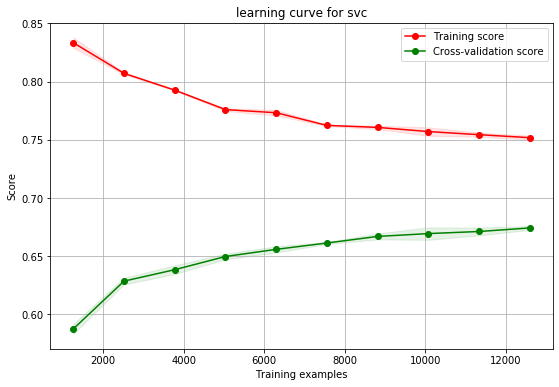

In [150]:
svc=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
plot_learning_curve(estimator=svc,title='learning curve for svc',X=train_x,y=train_y)

### **unable to produce good f1_score**

In [142]:
svc.fit(train_x,train_y)
svc_predictions=svc.predict(val_x)
report=classification_report(val_y,svc_predictions)
print(report)

              precision    recall  f1-score   support

           1       0.70      0.52      0.60      1630
           2       0.69      0.94      0.80      3294
           3       0.66      0.52      0.58      1638
           4       0.65      0.46      0.54      1540

    accuracy                           0.68      8102
   macro avg       0.68      0.61      0.63      8102
weighted avg       0.68      0.68      0.67      8102



### **Gradient Boosting Classifier**



In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
#getting the hyper parameters of gradientboostingclassifier
GradientBoostingClassifier().get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [0]:
#creating parameter grid for randomized search cv for gradient boosting
gbc_param_grid_1={
    'n_estimators':np.arange(50,200,20),
    'learning_rate':np.arange(0.01,0.1,0.02),#howmuch you want to learn from each tree
    'subsample':np.arange(0.5,1.0,0.1),
    'max_depth':np.arange(4,7,1),
    'max_features':['sqrt','log2']
}

In [162]:
gbc=GradientBoostingClassifier()
random_gbc=RandomizedSearchCV(estimator=gbc,param_distributions=gbc_param_grid_1,n_jobs=-1,n_iter=100,verbose=1)
random_gbc.fit(train_x,train_y)
random_gbc.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.0min finished


{'learning_rate': 0.08999999999999998,
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'subsample': 0.8999999999999999}

### **Bad learning curves**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

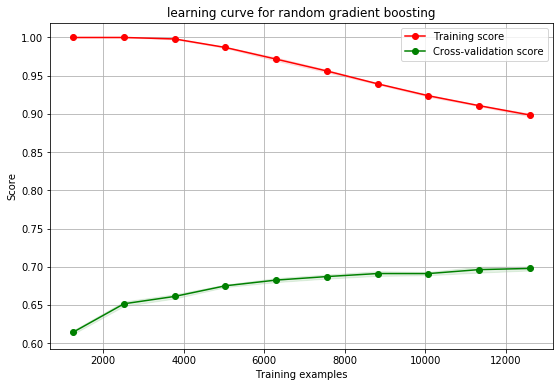

In [165]:
rgb=GradientBoostingClassifier(learning_rate=0.09,max_depth= 6,max_features='sqrt',n_estimators= 150,subsample= 0.9)
plot_learning_curve(estimator=rgb,title='learning curve for random gradient boosting',X=train_x,y=train_y)

###**Not so good classification**

In [166]:
rgb=GradientBoostingClassifier(learning_rate=0.09,max_depth= 6,max_features='sqrt',n_estimators= 150,subsample= 0.9)
rgb.fit(train_x,train_y)
rgb_predictions=rgb.predict(val_x)
report=classification_report(val_y,rgb_predictions)
print(report)

              precision    recall  f1-score   support

           1       0.70      0.57      0.63      1630
           2       0.74      0.91      0.81      3294
           3       0.65      0.57      0.61      1638
           4       0.62      0.52      0.57      1540

    accuracy                           0.70      8102
   macro avg       0.68      0.64      0.65      8102
weighted avg       0.69      0.70      0.69      8102



### **Artificial Neural Networks**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
import keras
from keras import optimizers
from keras import metrics

In [0]:
#creating a neural network with 3 hidden layers with 0.2 drop outs
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model = Sequential()
model.add(Dense(40, input_dim=18))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [232]:
model.fit(train_x, np_utils.to_categorical(train_y),
                  batch_size=64, 
                  epochs=250,
                  validation_split=0.2
             )

Train on 15123 samples, validate on 3781 samples
Epoch 1/250
15123/15123 [==============================] - 2s 122us/step - loss: 1.3475 - acc: 0.3870 - val_loss: 1.2221 - val_acc: 0.4538
Epoch 2/250
15123/15123 [==============================] - 1s 90us/step - loss: 1.2012 - acc: 0.4801 - val_loss: 1.0769 - val_acc: 0.5586
Epoch 3/250
15123/15123 [==============================] - 1s 88us/step - loss: 1.0931 - acc: 0.5526 - val_loss: 0.9768 - val_acc: 0.6213
Epoch 4/250
15123/15123 [==============================] - 1s 88us/step - loss: 1.0301 - acc: 0.5871 - val_loss: 0.9325 - val_acc: 0.6435
Epoch 5/250
15123/15123 [==============================] - 1s 87us/step - loss: 0.9939 - acc: 0.6055 - val_loss: 0.9037 - val_acc: 0.6469
Epoch 6/250
15123/15123 [==============================] - 1s 88us/step - loss: 0.9720 - acc: 0.6188 - val_loss: 0.8929 - val_acc: 0.6620
Epoch 7/250
15123/15123 [==============================] - 1s 91us/step - loss: 0.9569 - acc: 0.6259 - val_loss: 0.8743 - 

### **Best classification** 

In [177]:
from numpy import argmax
from sklearn.metrics import classification_report
val_pred=argmax(model.predict(val_x), axis = 1)
report=classification_report(val_y,val_pred)
print(report)

              precision    recall  f1-score   support

           1       0.77      0.61      0.68      1630
           2       0.87      0.97      0.92      3294
           3       0.65      0.70      0.68      1638
           4       0.77      0.68      0.72      1540

    accuracy                           0.79      8102
   macro avg       0.77      0.74      0.75      8102
weighted avg       0.79      0.79      0.78      8102



In [179]:
pred_ann = argmax(model.predict(test_x), axis = 1)
predictions_ann=pd.DataFrame({'id':test_factor_id,'alpha':pred_ann})
predictions_ann.head()

,id,alpha
0,270007,4
1,270008,1
2,270009,2
3,270010,1
4,270011,3


In [0]:
predictions_ann.to_csv('predictions_ann.csv',index=False)

### **Trying to predict alpha signal not taking sentiment into consideration**

In [0]:
test_x.drop(['mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)

In [183]:
train_x.drop(['mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)
val_x.drop(['mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)
val_x.head()

,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,day,month,weekday
15325,2.679245,1.648344,-1.059224,0.775887,-0.745877,-2.590491,1.663090,1.670723,-0.996452,-0.687805,1.205672
12371,2.196721,0.064833,-0.902271,-0.161303,-0.132449,0.264831,0.718858,0.179580,0.157017,0.505262,-0.879760
15953,2.250000,0.641356,-1.655889,-0.027569,-1.556762,-0.445485,0.515623,1.497162,0.925997,-0.290116,-0.879760
12701,2.400000,0.722192,0.007777,-0.023003,-1.427566,-0.497139,0.652812,1.489069,-0.868289,1.300639,1.205672
9724,1.833340,1.406408,0.669134,-0.572655,-1.087664,0.163290,0.425403,2.031379,0.028854,0.107573,0.684314


In [0]:
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model = Sequential()
model.add(Dense(40, input_dim=11))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [185]:
model.fit(train_x, np_utils.to_categorical(train_y),
                  batch_size=64, 
                  epochs=250,
                  validation_split=0.2
             )

Train on 15123 samples, validate on 3781 samples
Epoch 1/250
15123/15123 [==============================] - 2s 116us/step - loss: 1.3868 - acc: 0.3866 - val_loss: 1.2394 - val_acc: 0.4771
Epoch 2/250
15123/15123 [==============================] - 1s 89us/step - loss: 1.2001 - acc: 0.4950 - val_loss: 1.0836 - val_acc: 0.5570
Epoch 3/250
15123/15123 [==============================] - 1s 90us/step - loss: 1.1059 - acc: 0.5467 - val_loss: 1.0106 - val_acc: 0.6054
Epoch 4/250
15123/15123 [==============================] - 1s 91us/step - loss: 1.0509 - acc: 0.5736 - val_loss: 0.9704 - val_acc: 0.6244
Epoch 5/250
15123/15123 [==============================] - 1s 91us/step - loss: 1.0139 - acc: 0.5959 - val_loss: 0.9458 - val_acc: 0.6337
Epoch 6/250
15123/15123 [==============================] - 1s 94us/step - loss: 0.9865 - acc: 0.6103 - val_loss: 0.9220 - val_acc: 0.6461
Epoch 7/250
15123/15123 [==============================] - 1s 88us/step - loss: 0.9638 - acc: 0.6214 - val_loss: 0.8950 - 

In [186]:
val_pred=argmax(model.predict(val_x), axis = 1)
report=classification_report(val_y,val_pred)
print(report)

              precision    recall  f1-score   support

           1       0.67      0.66      0.66      1630
           2       0.89      0.96      0.92      3294
           3       0.62      0.60      0.61      1638
           4       0.74      0.67      0.71      1540

    accuracy                           0.77      8102
   macro avg       0.73      0.72      0.73      8102
weighted avg       0.77      0.77      0.77      8102



### **Here we can see that sentiment score does have an affect on alpha signal prediction**

Following the process of including sentiment score into the model has given us great results and is able to replicate the model created by state of the art algorithm which uses several more variables very well by just using 7 factors and sentiment score this will help the company predict the alpha signal and invest propely with minimal cost and with good efficiency.....